/opt/conda/lib/python3.7/site-packages/transformers/models/segformer/feature_extraction_segformer.py:31: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/transformers/models/segformer/image_processing_segformer.py:105: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  FutureWarning,


SC_PAR_20220831_131925_cam02.jpg
0


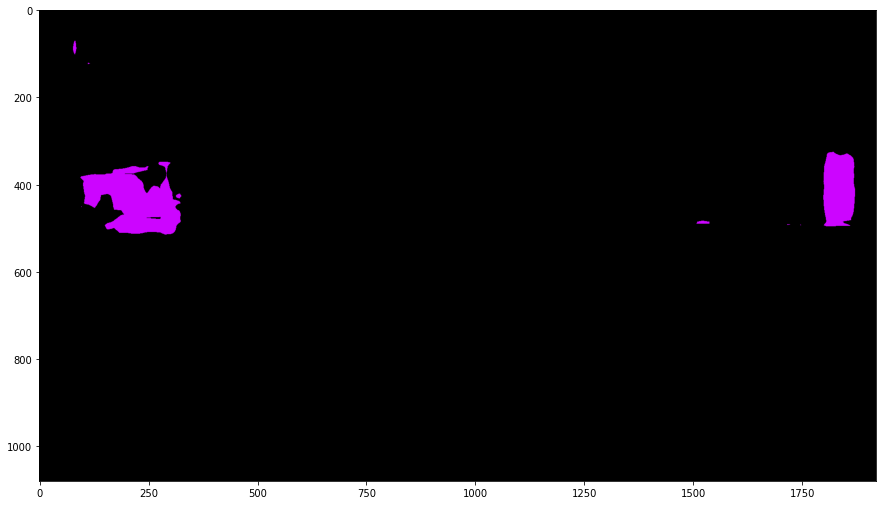

1


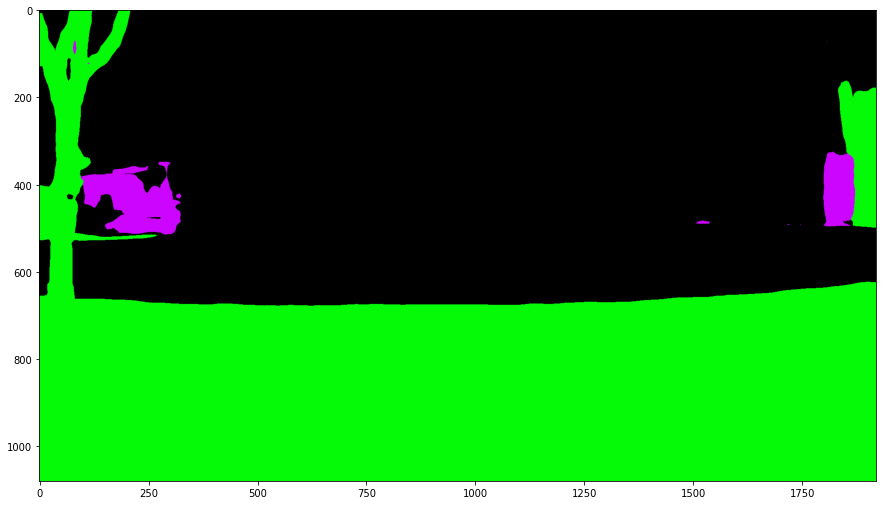

2


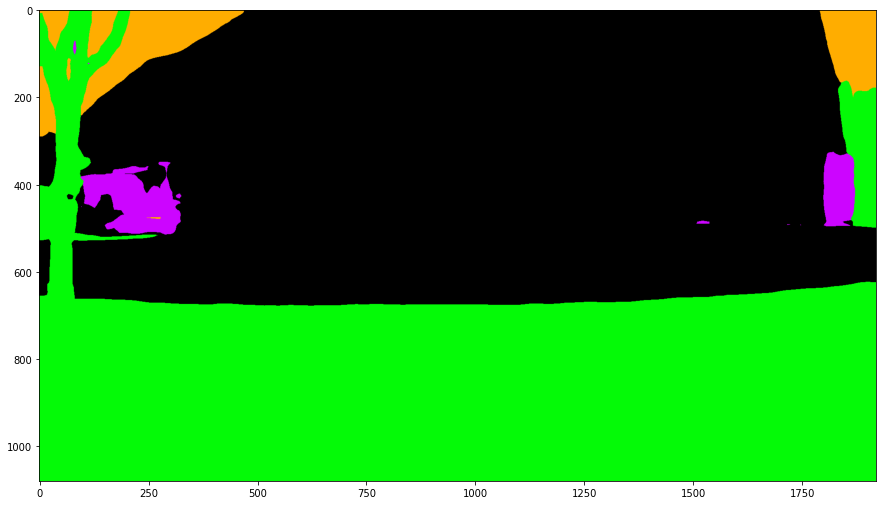

3


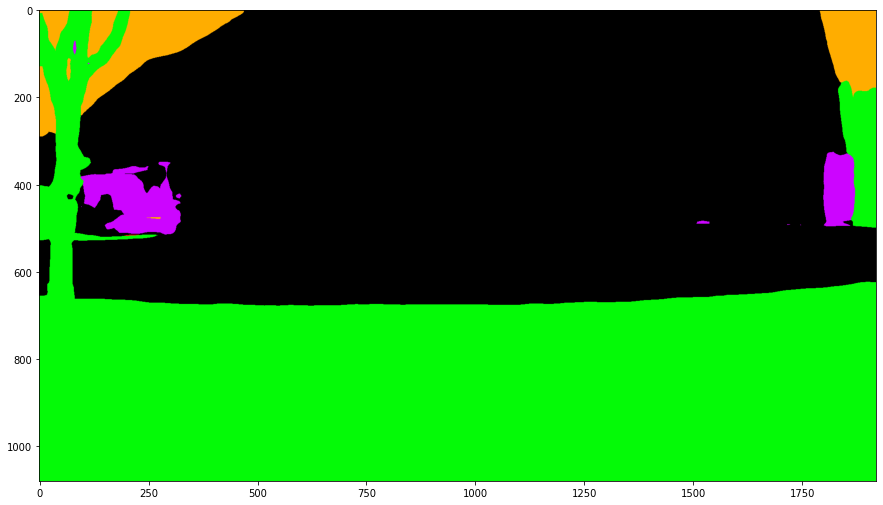

4


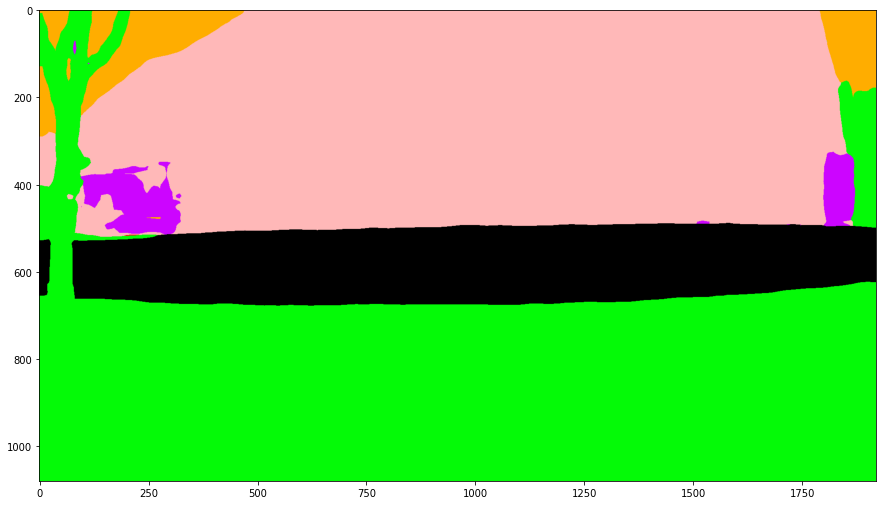

5


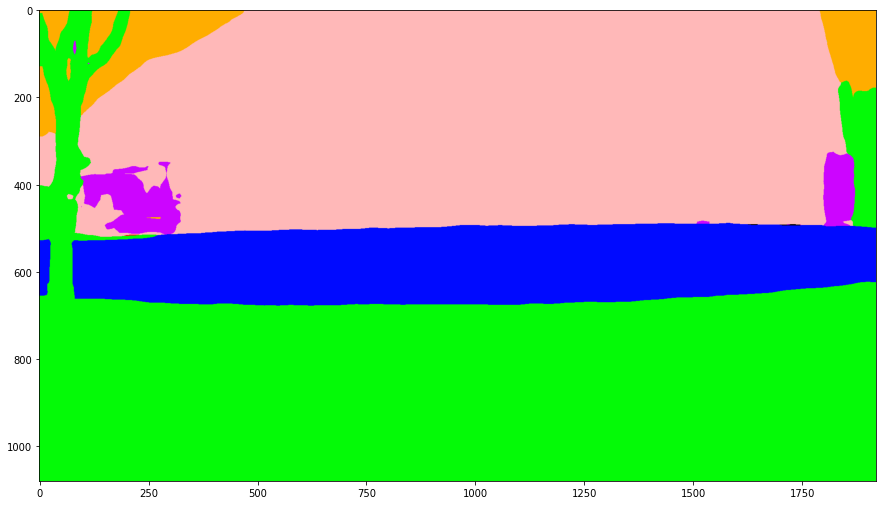

6


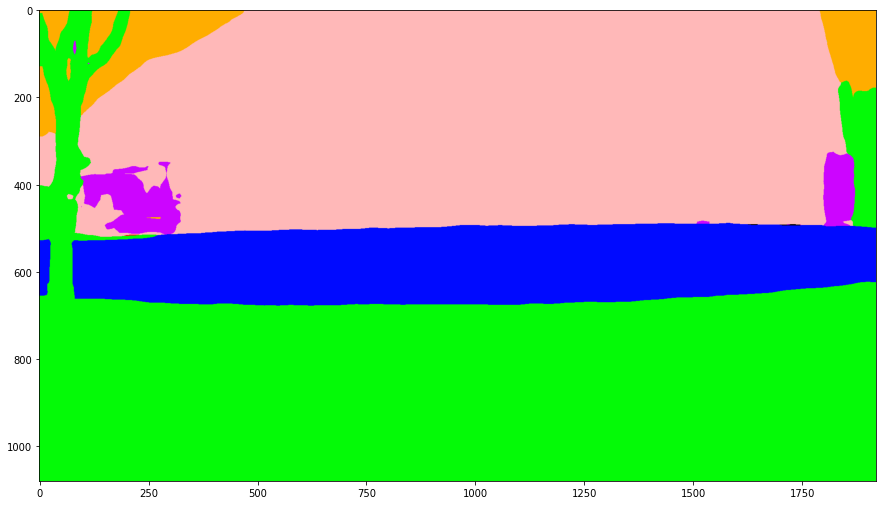

7


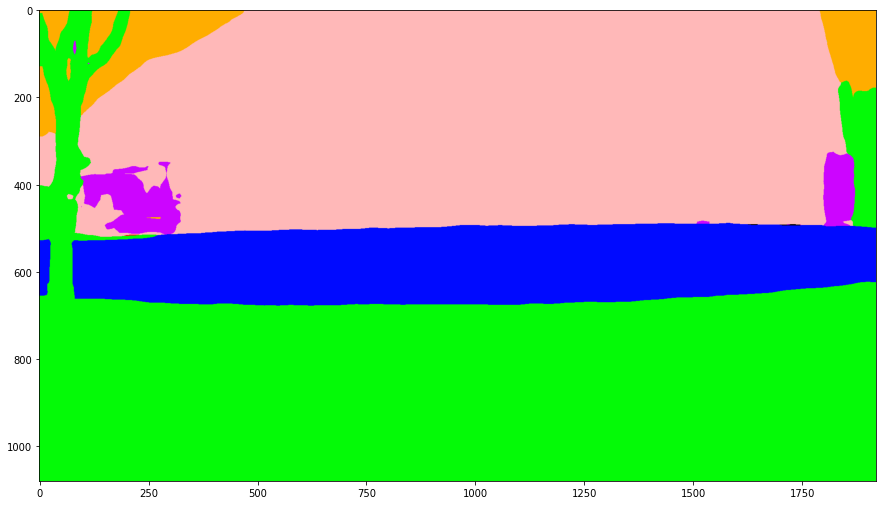

8


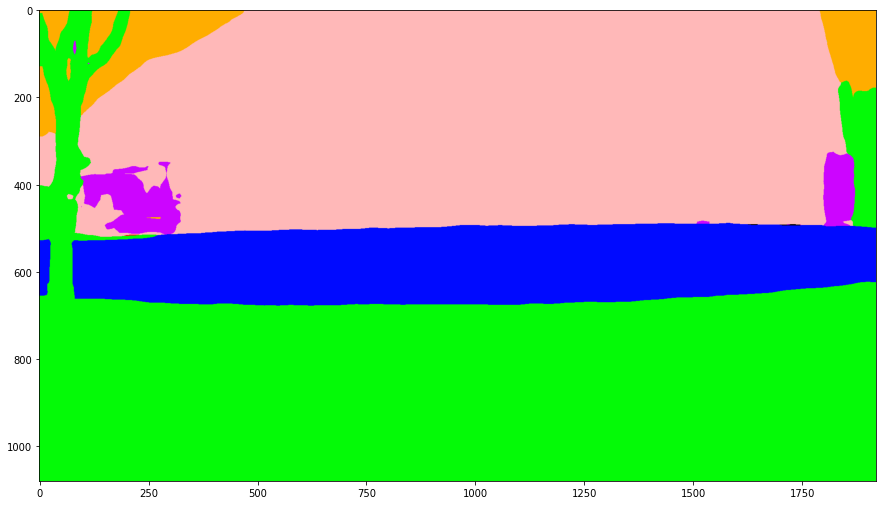

9


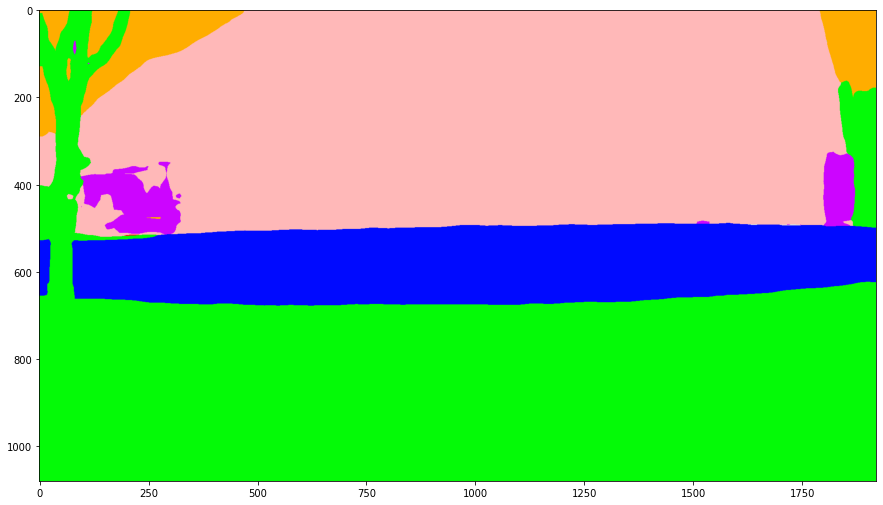

10


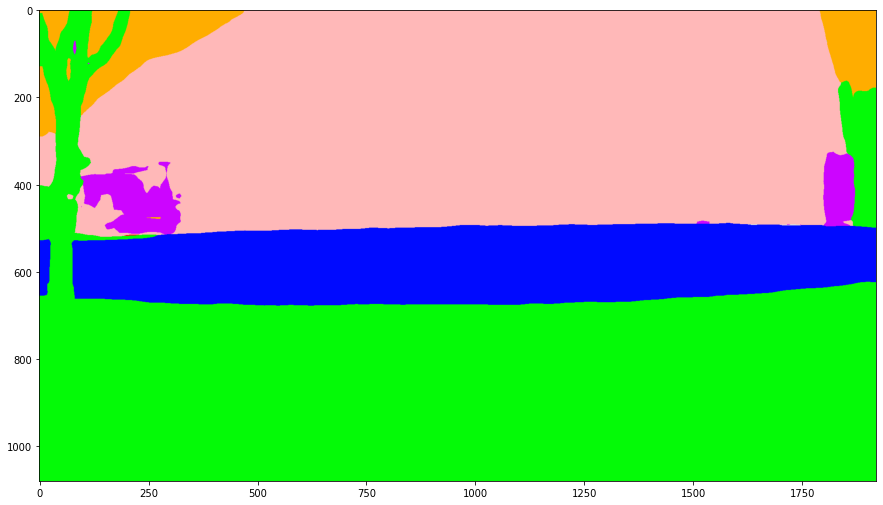

11


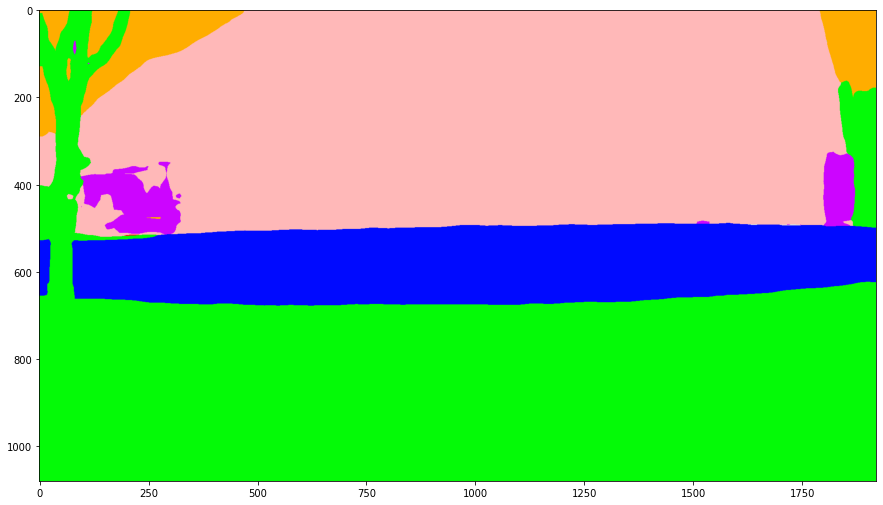

SC_PAR_20220831_131740_cam04.jpg
0


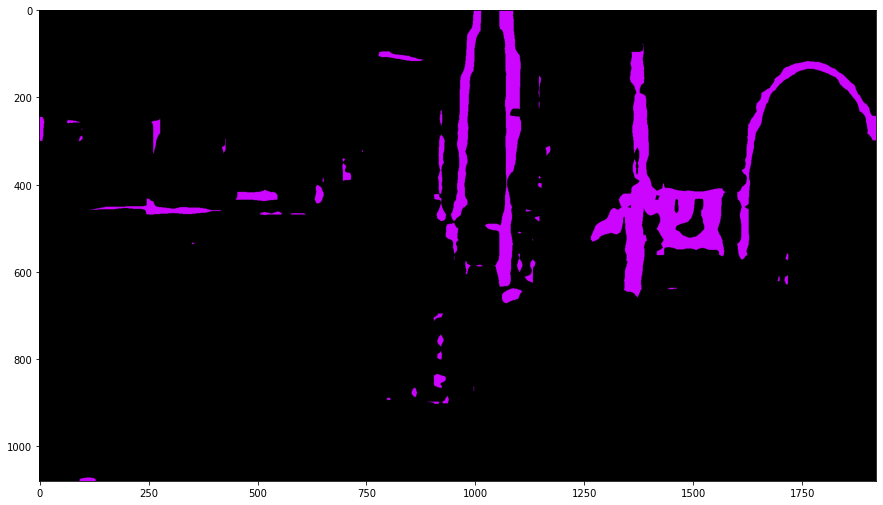

1


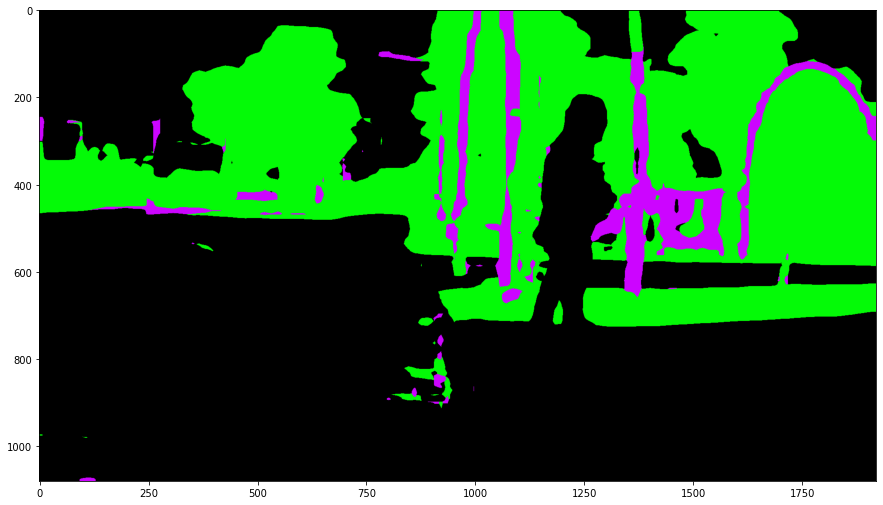

2


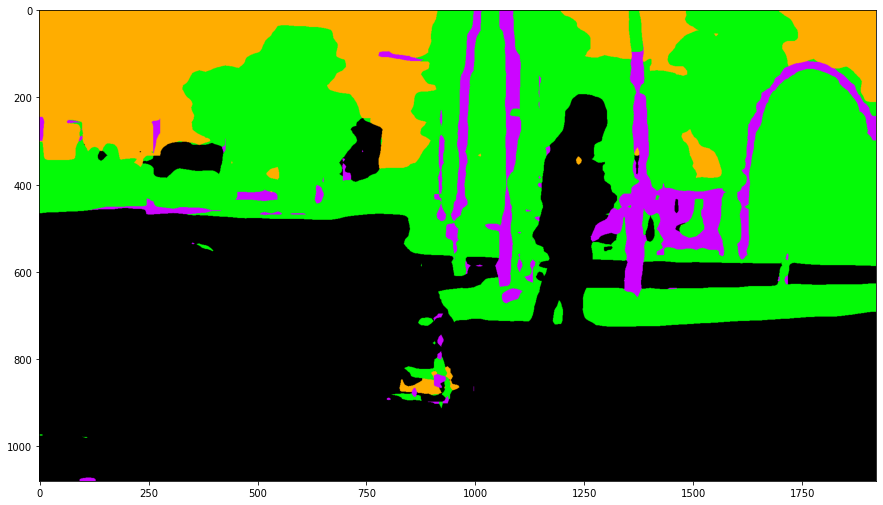

3


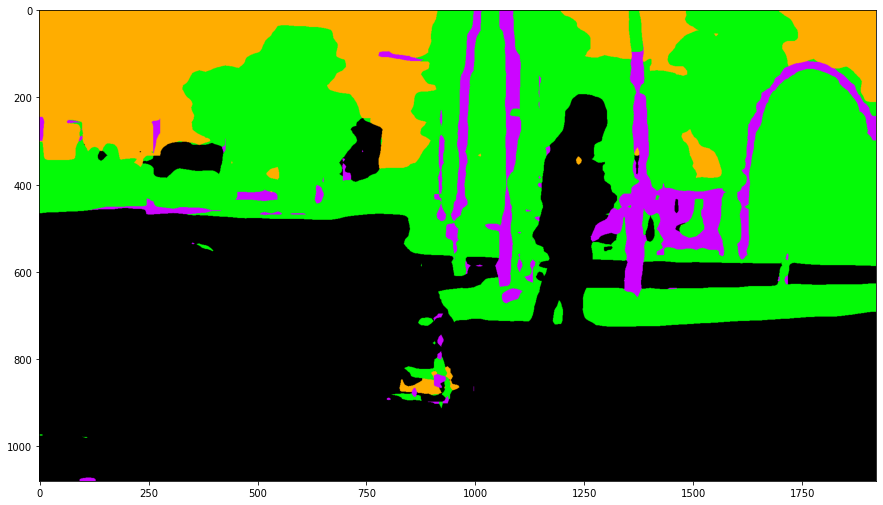

4


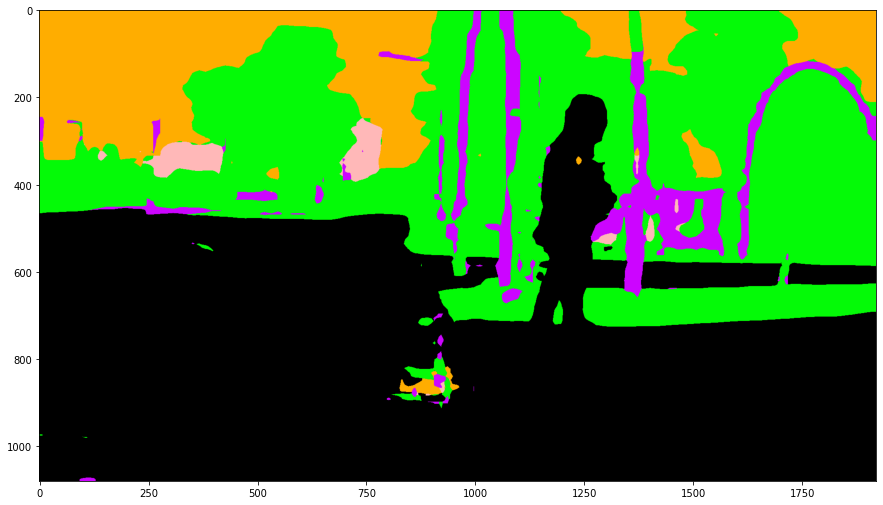

5


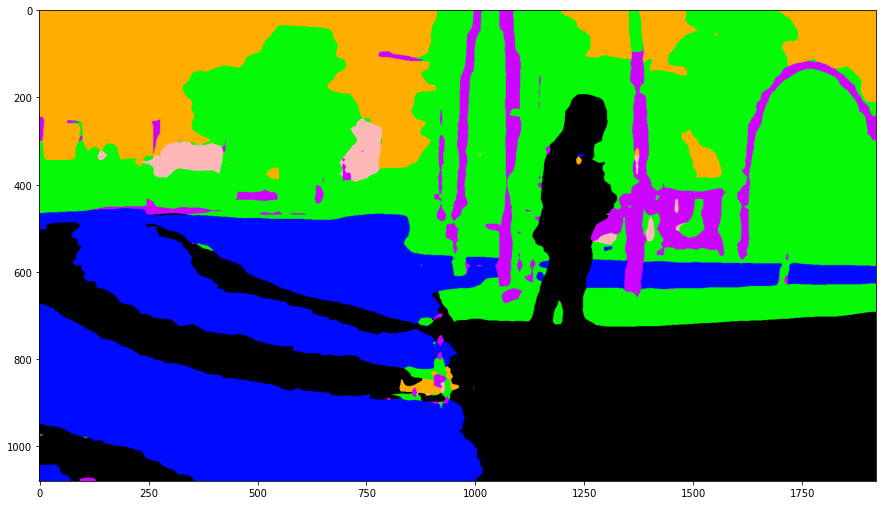

6


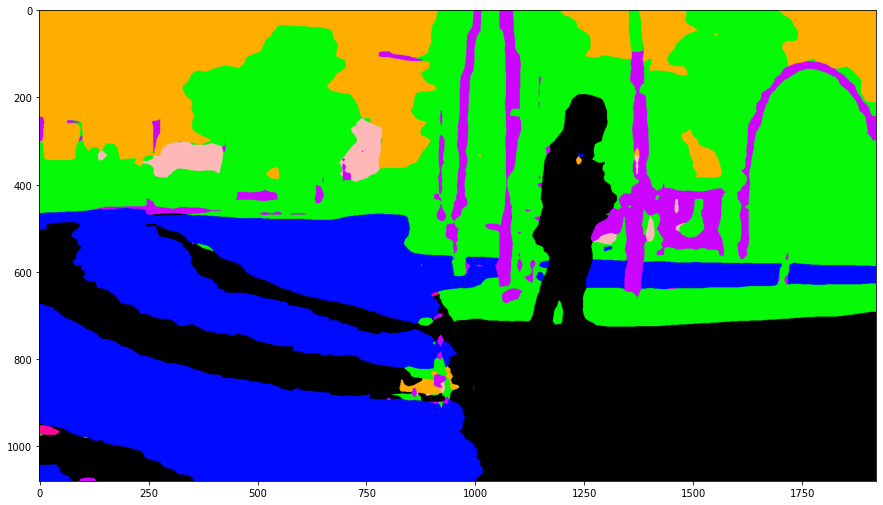

7


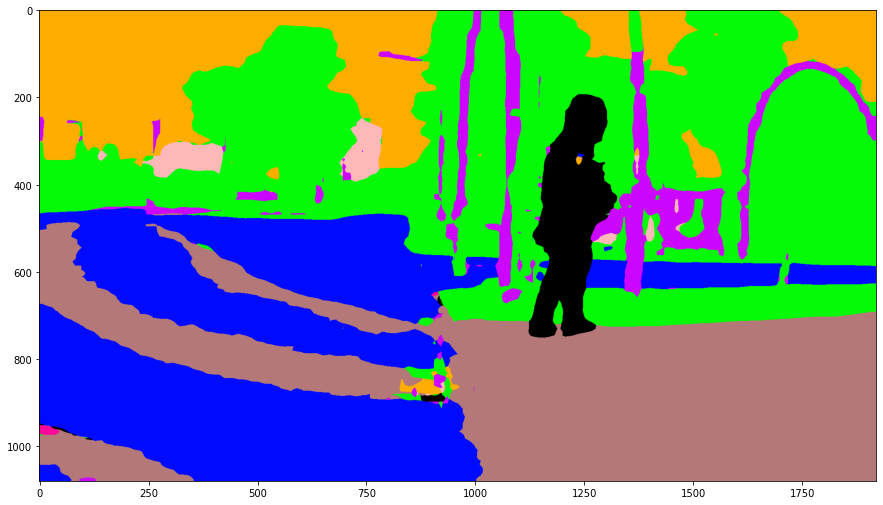

8


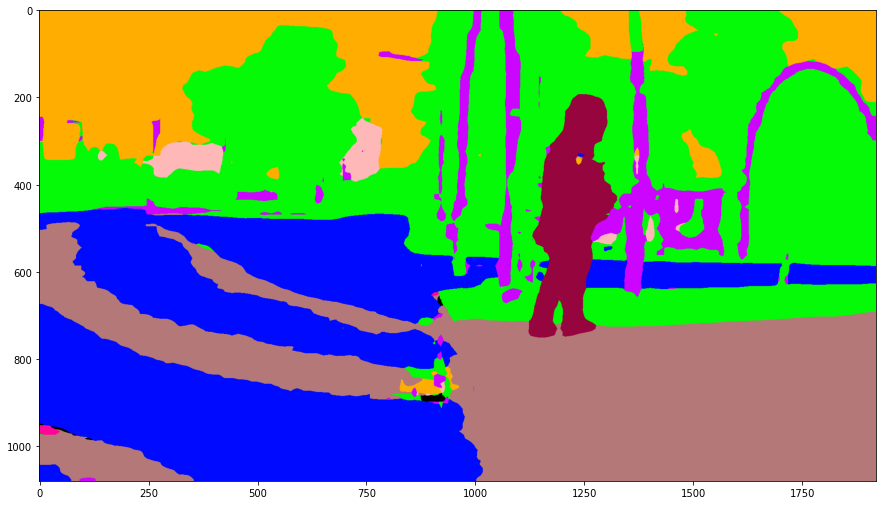

9


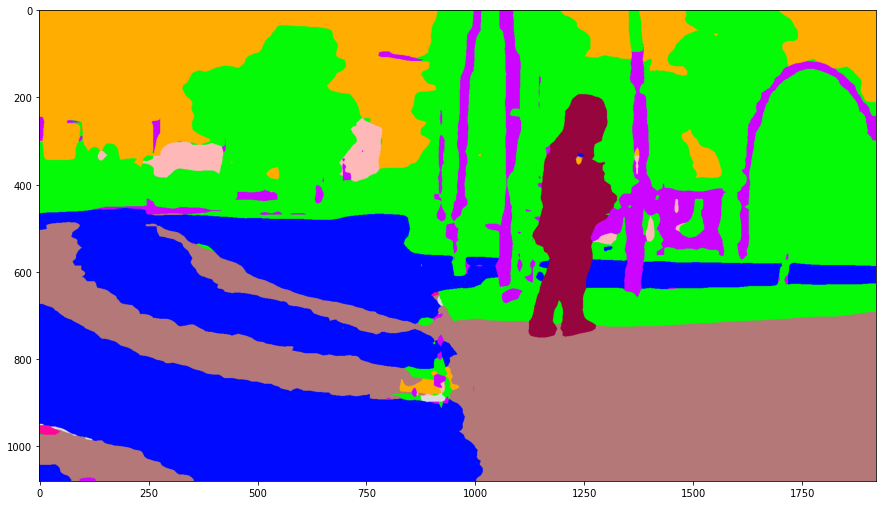

10


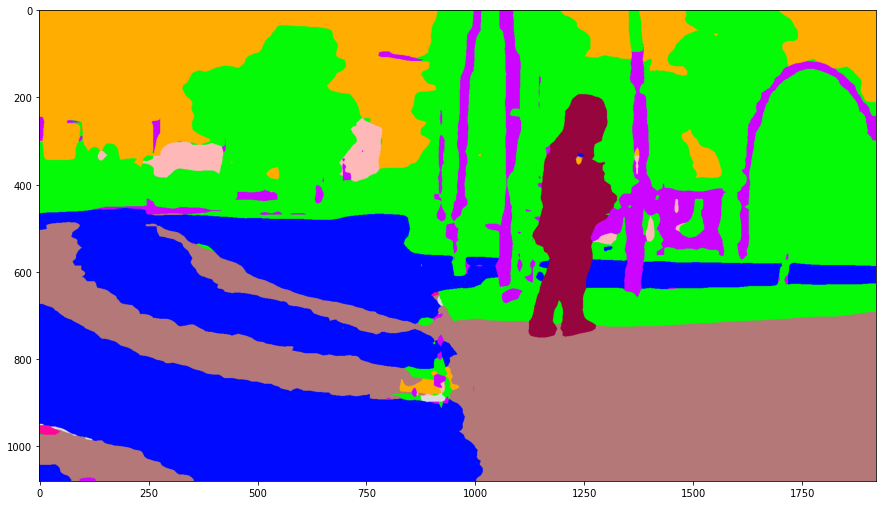

11


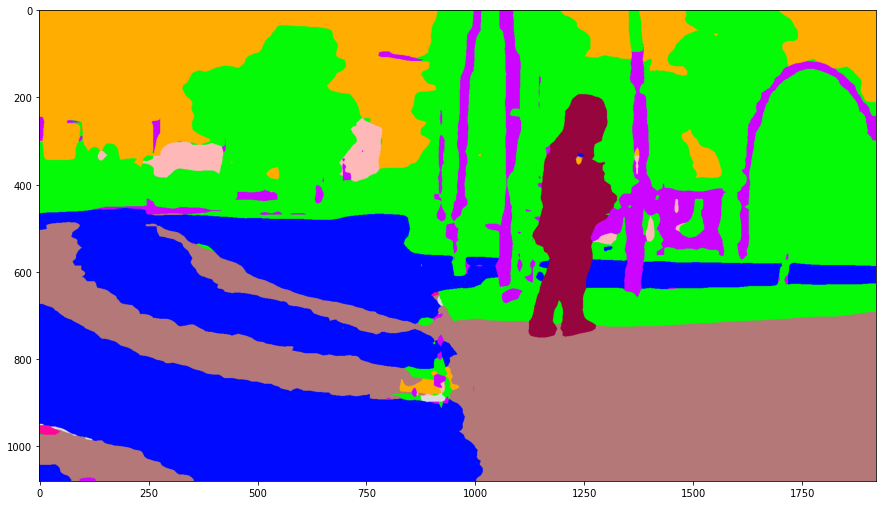

SC_PAR_20220831_131910_cam02.jpg
0


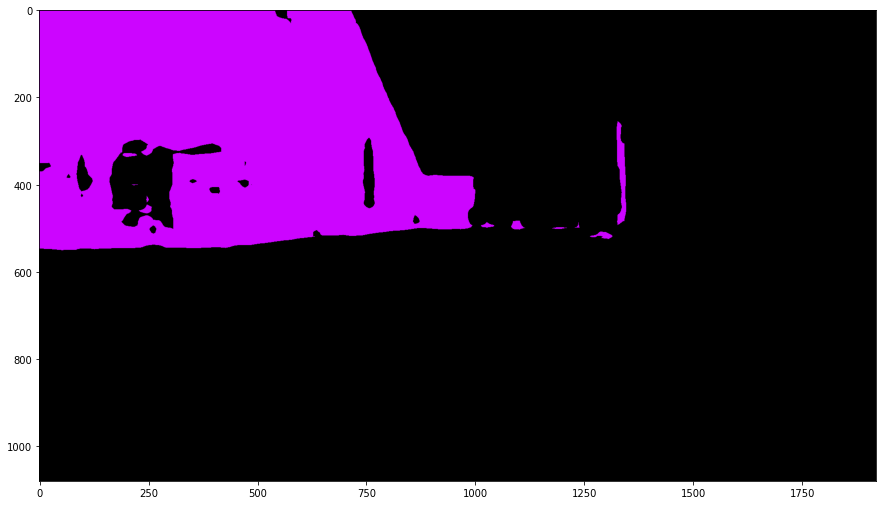

1


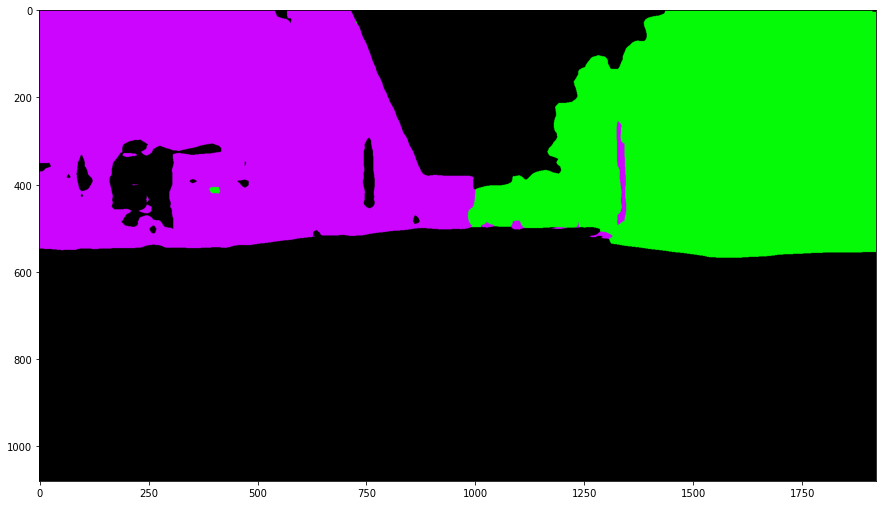

2


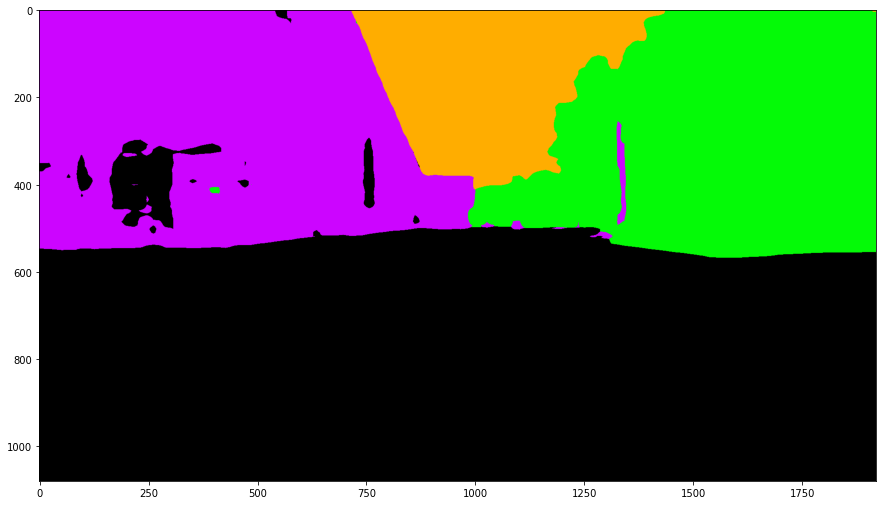

3


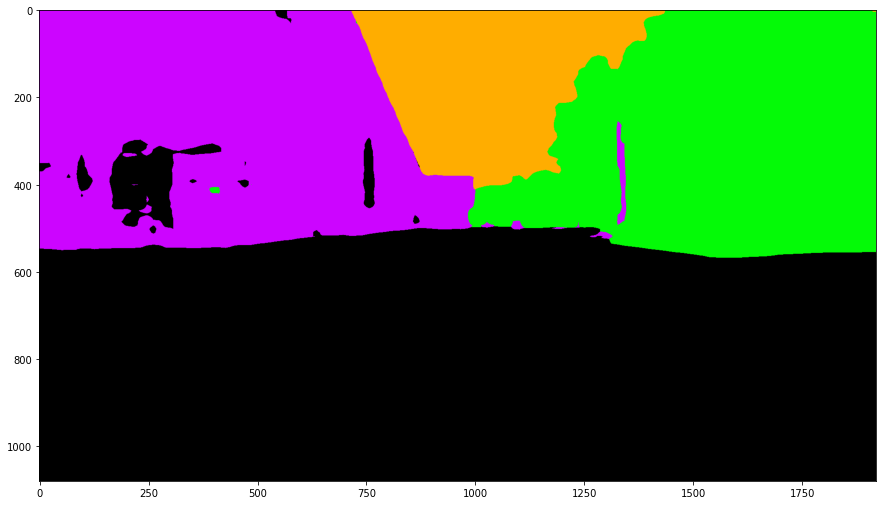

4


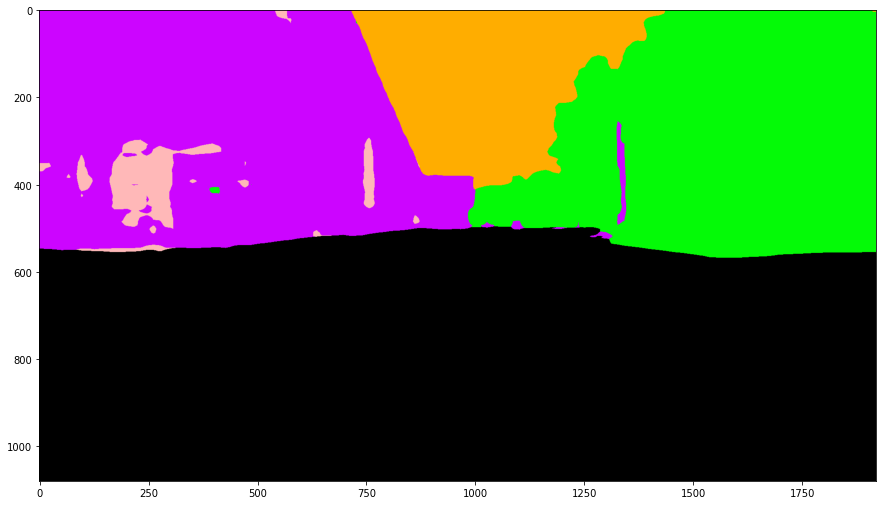

5


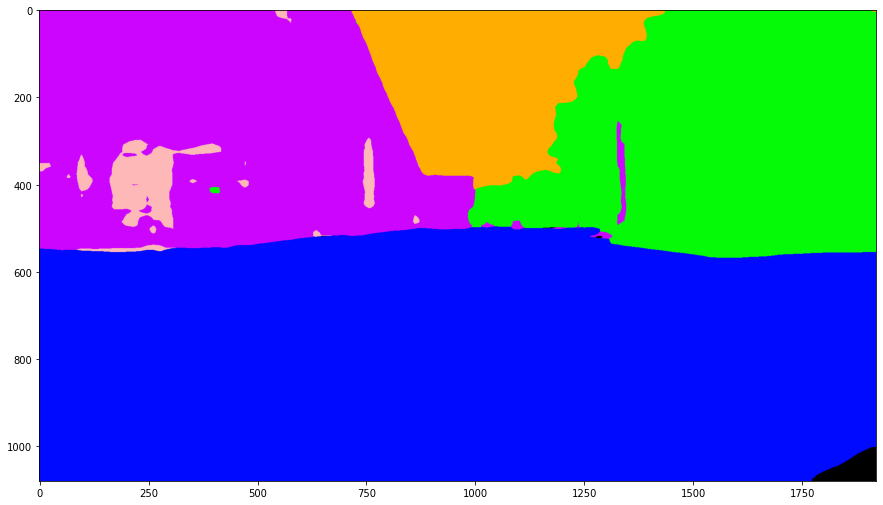

6


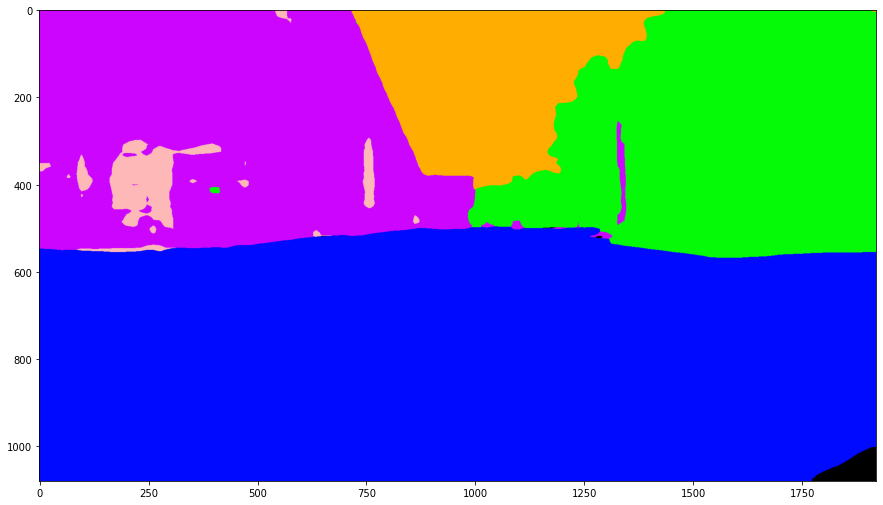

7


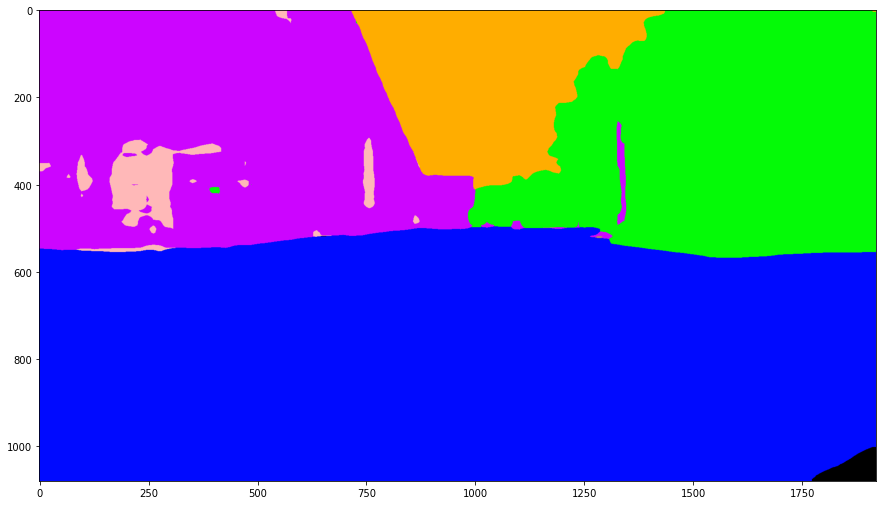

8


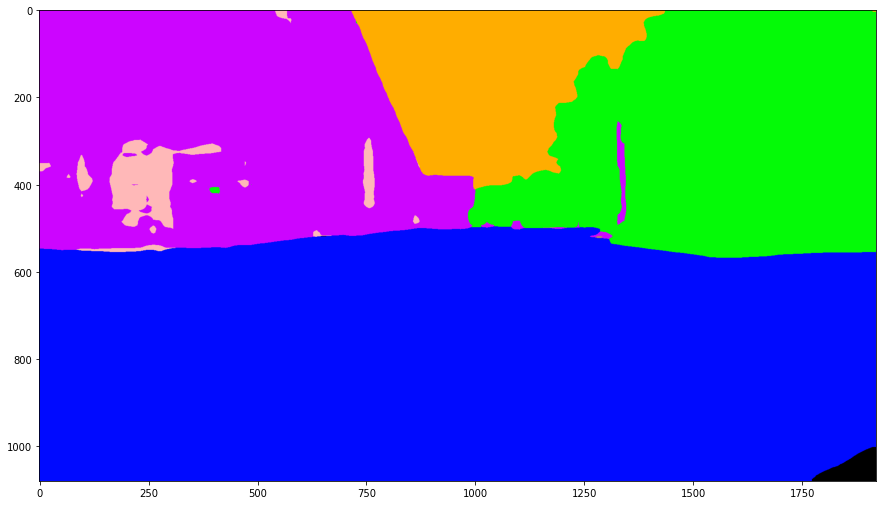

9


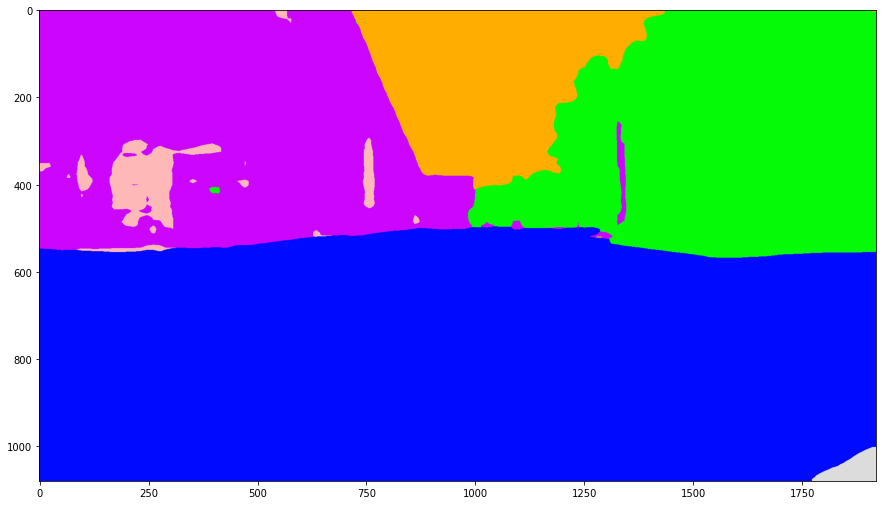

10


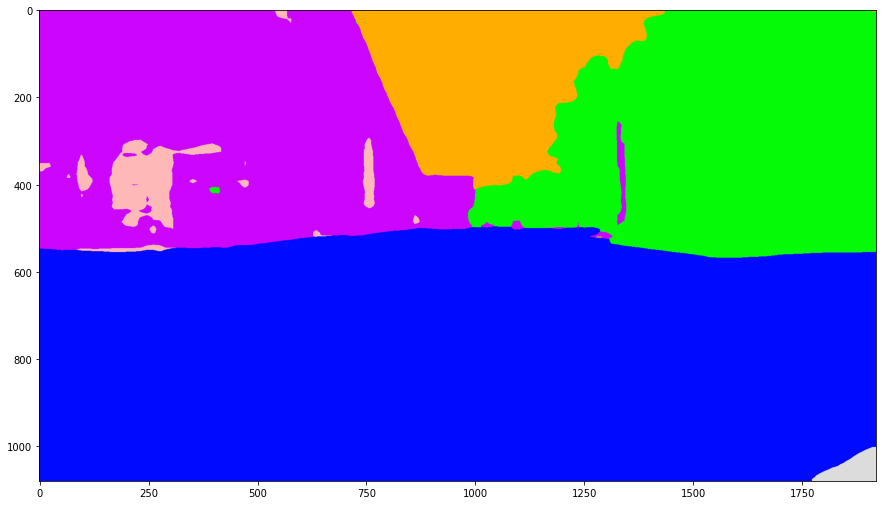

11


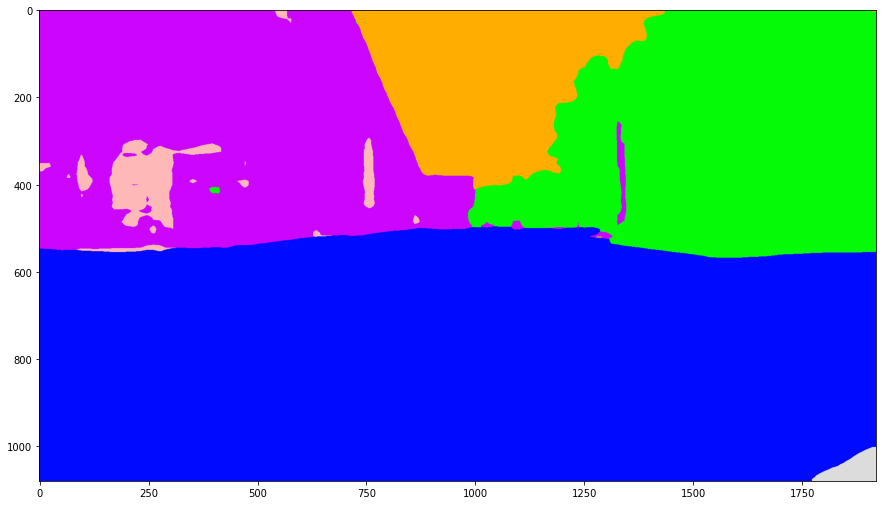

SC_PAR_20220831_131745_cam04.jpg
0


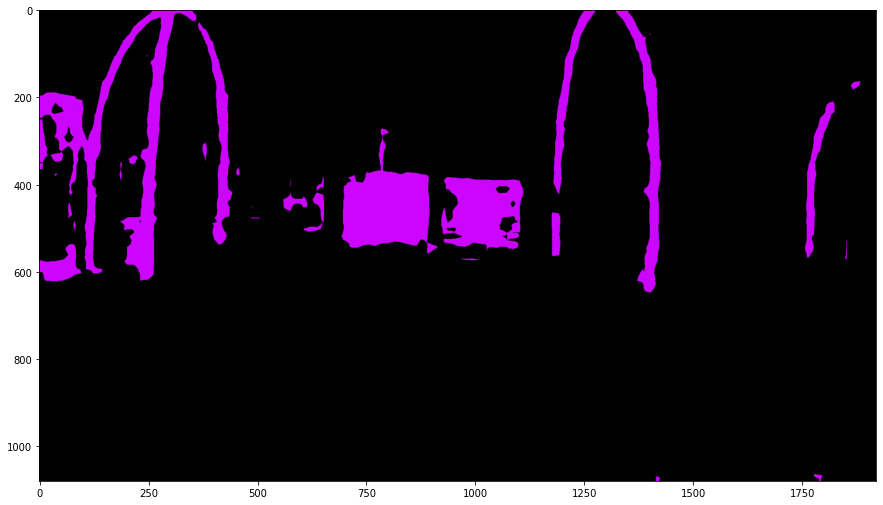

1


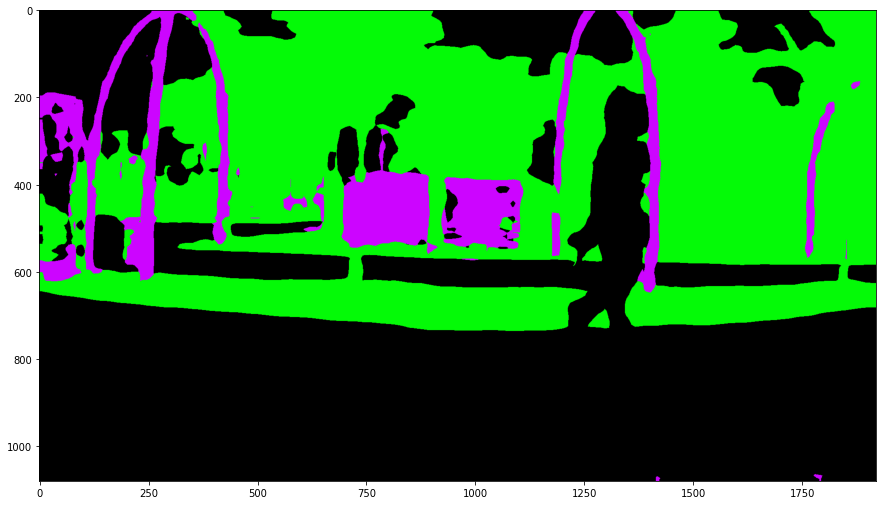

2


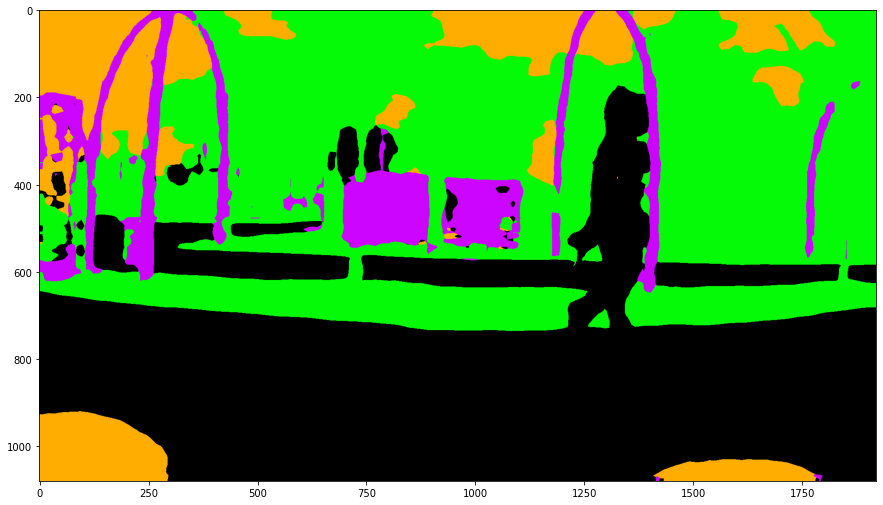

3


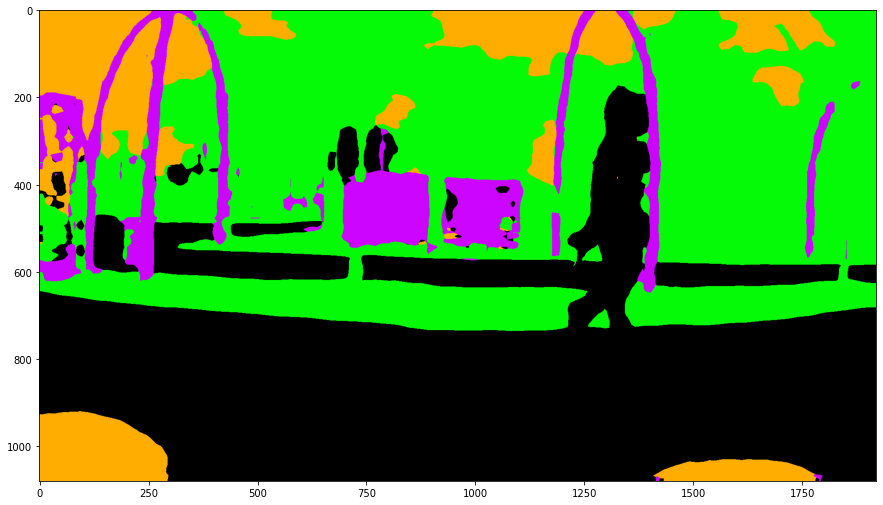

4


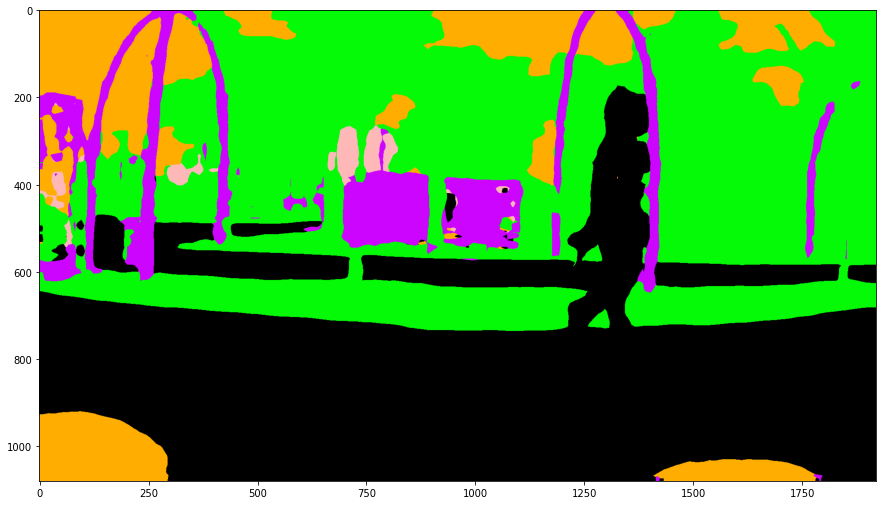

5


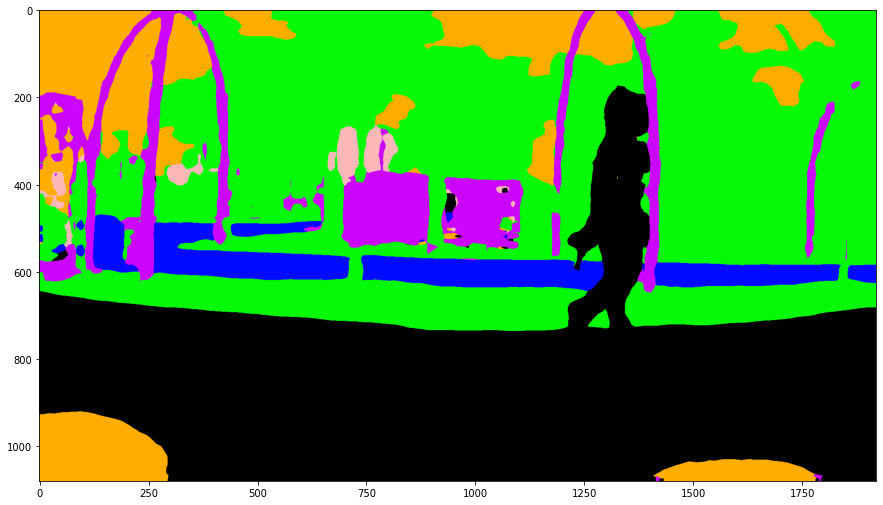

6


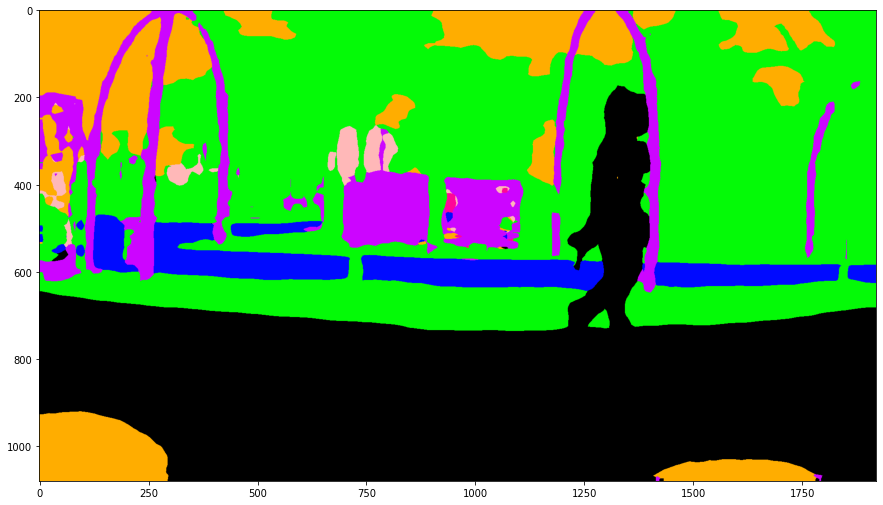

7


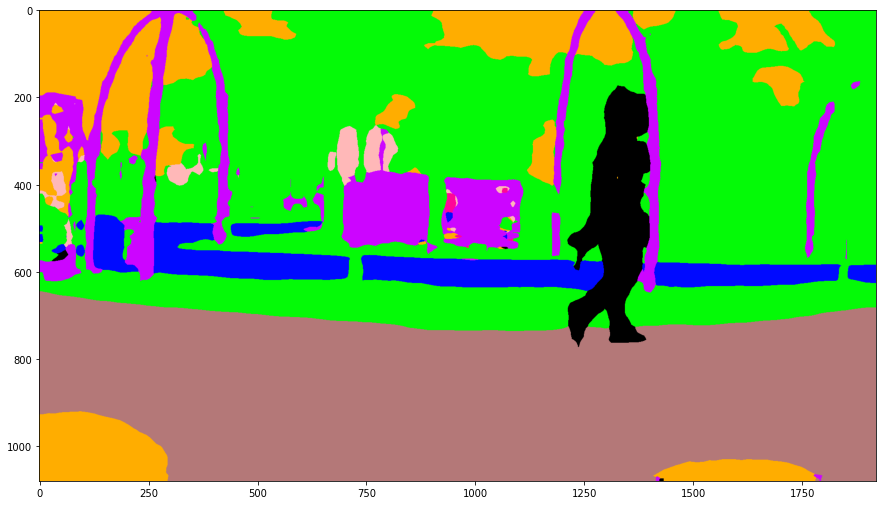

8


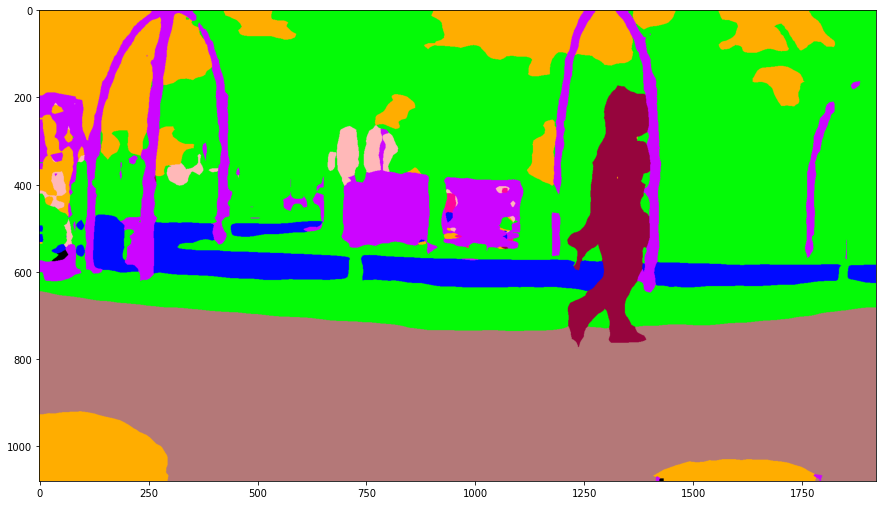

9


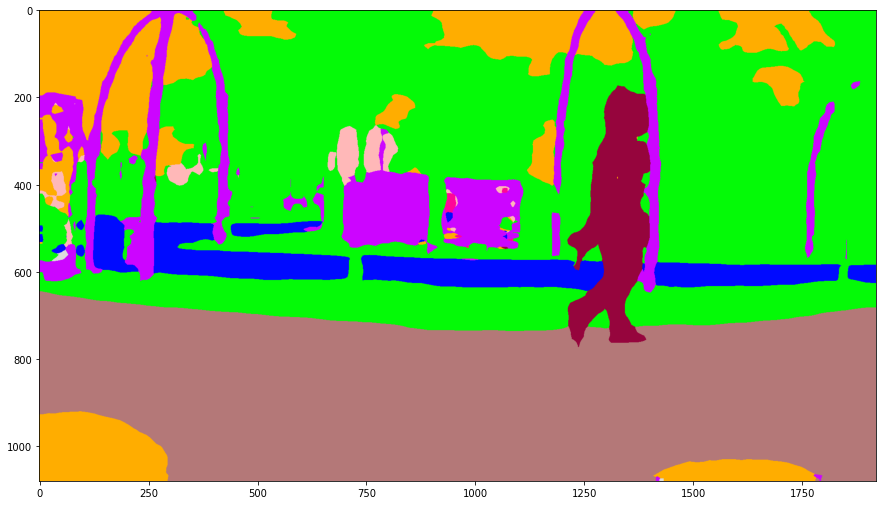

10


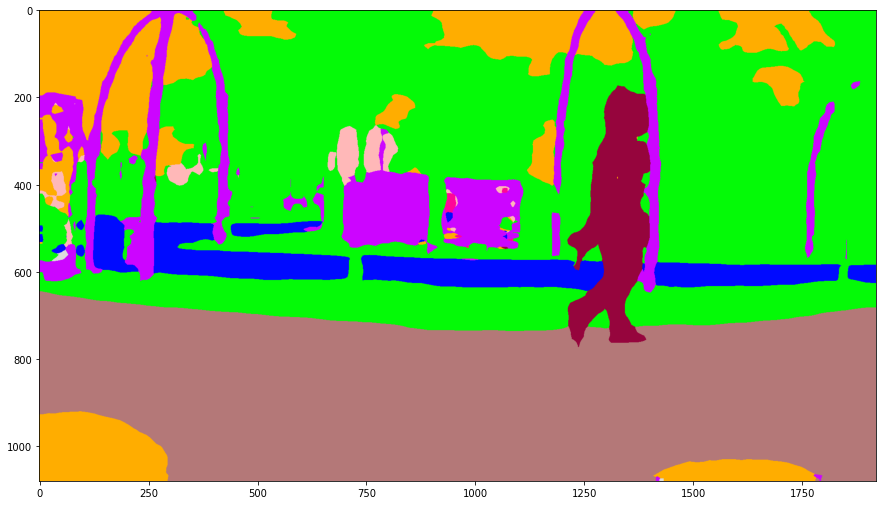

11


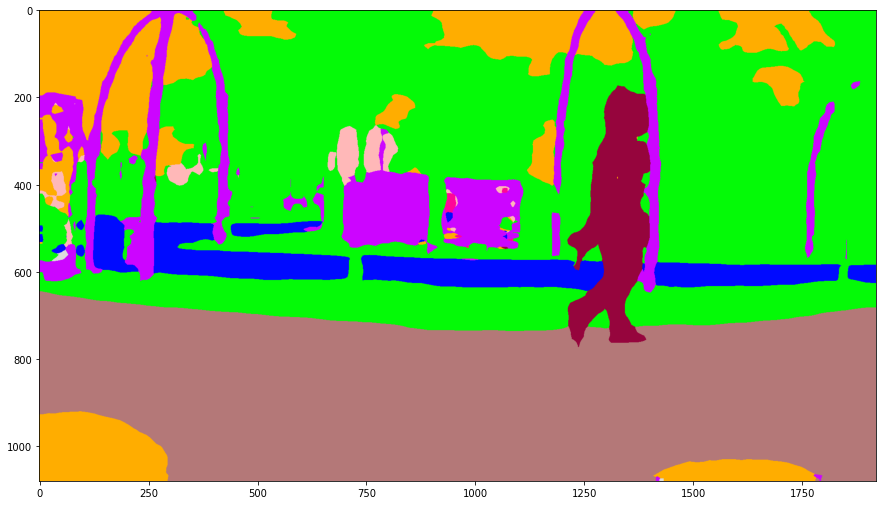

SC_PAR_20220831_131840_cam01.jpg
0


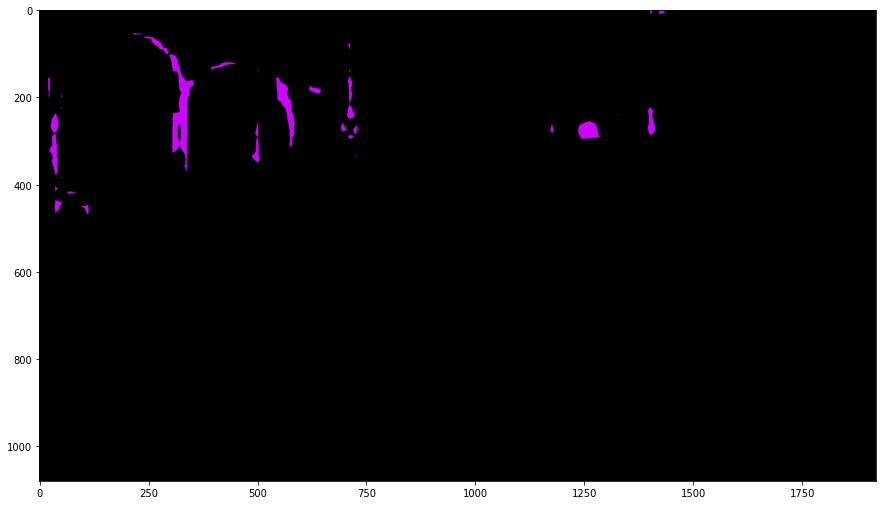

1


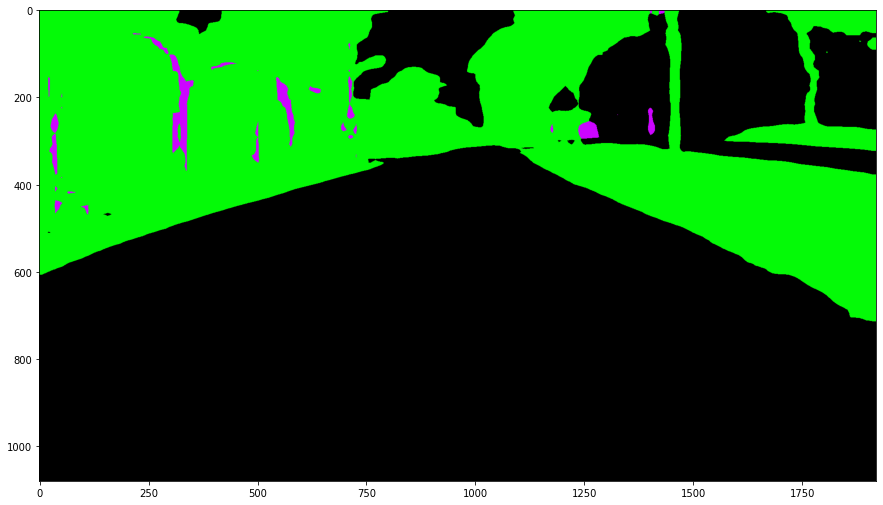

2


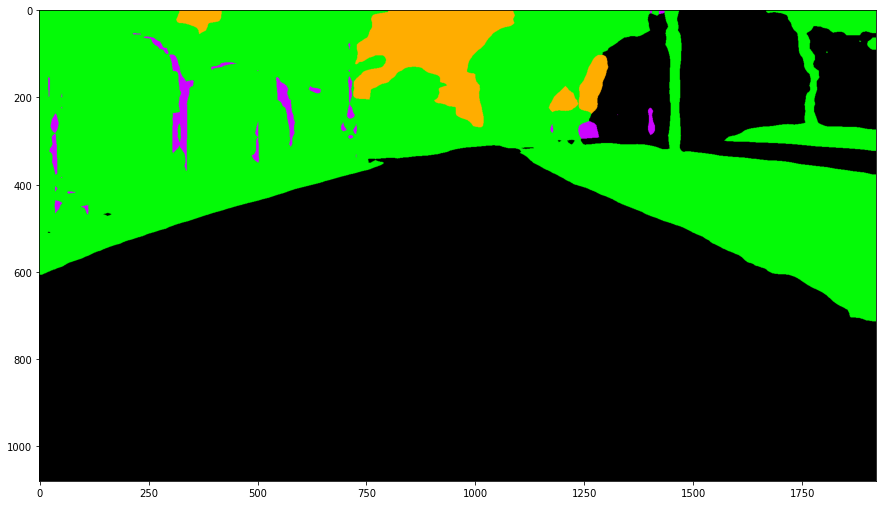

3


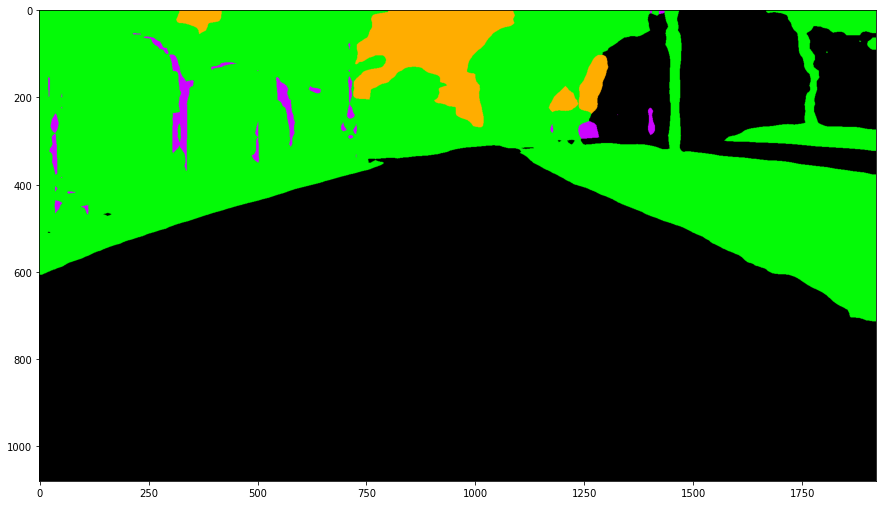

4


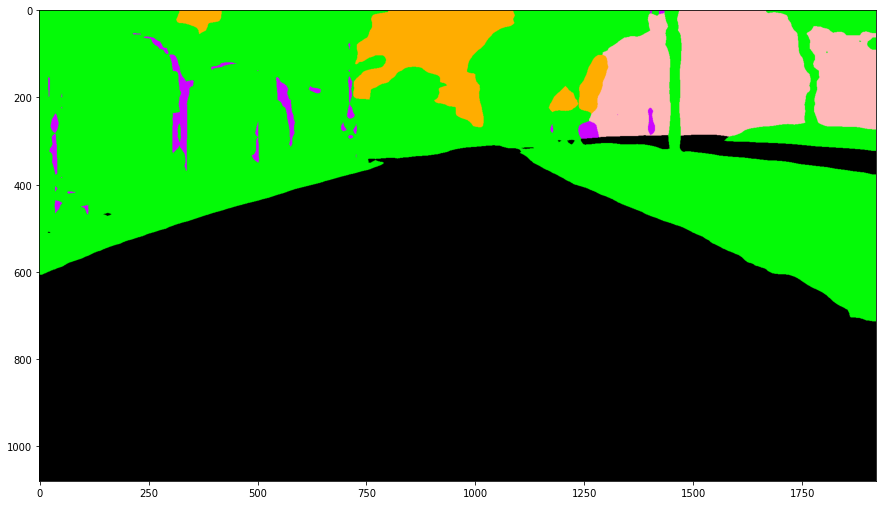

5


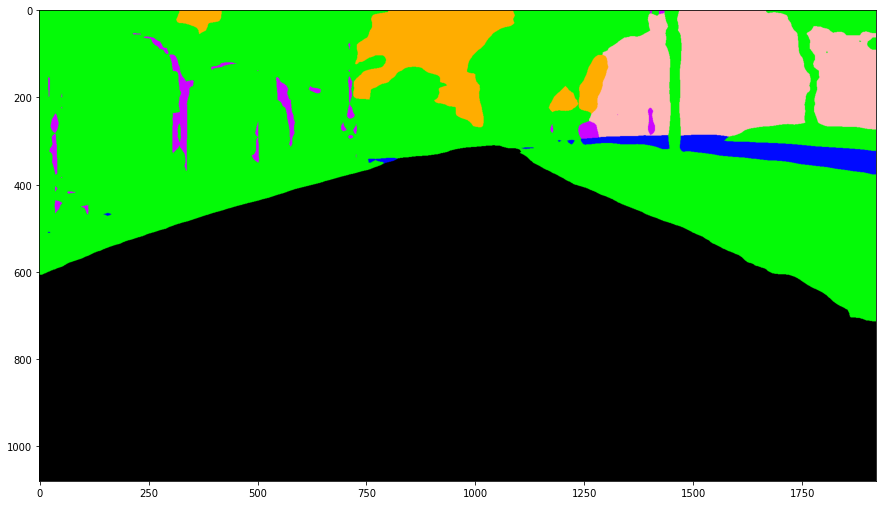

6


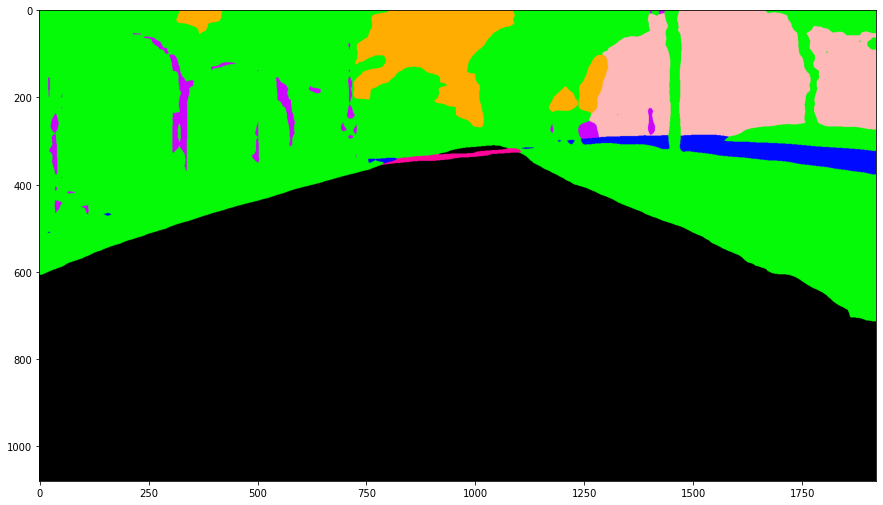

7


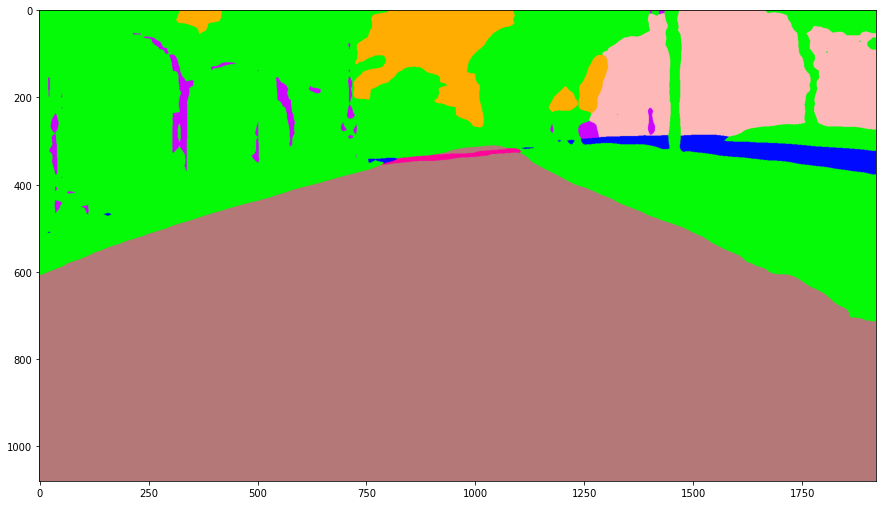

8


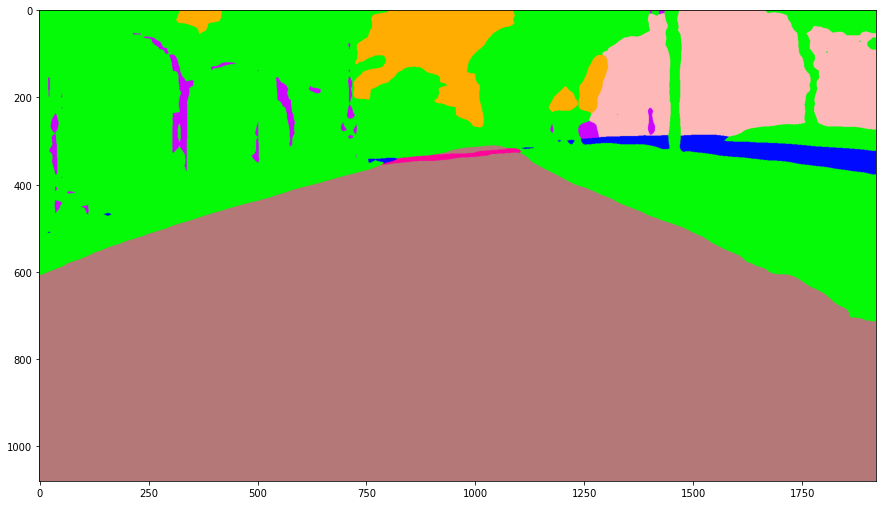

9


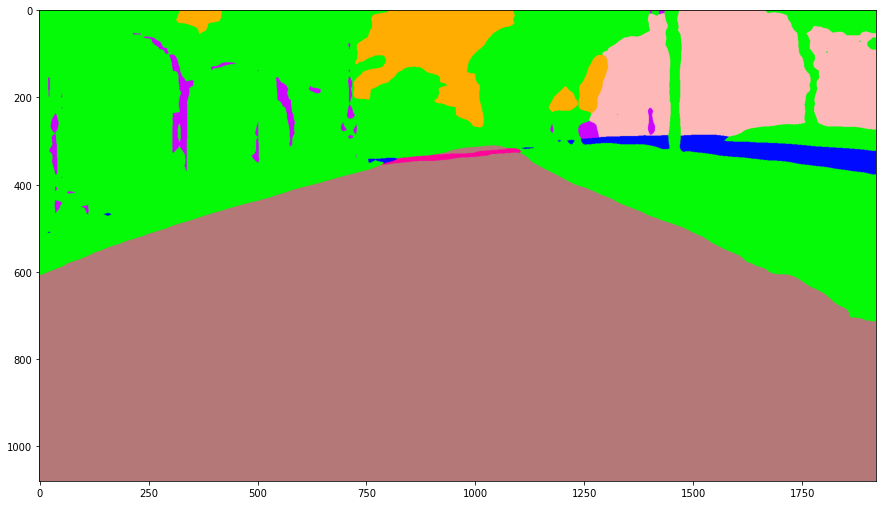

10


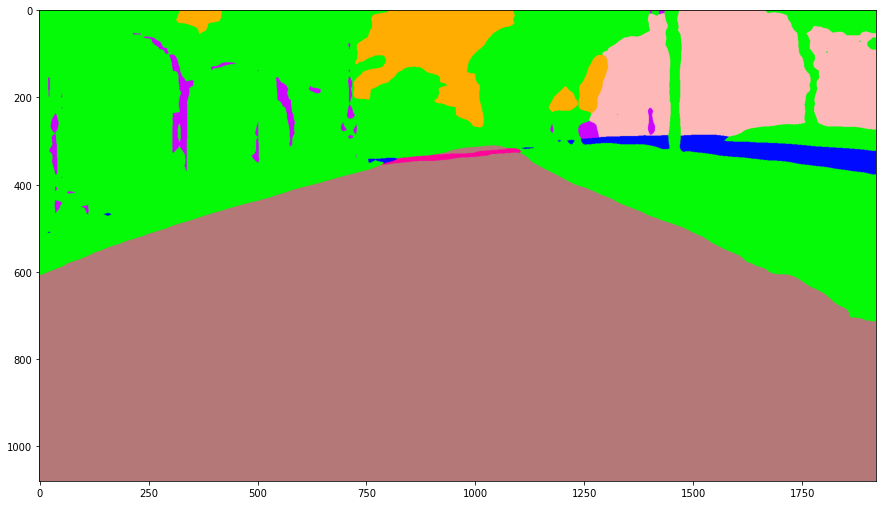

11


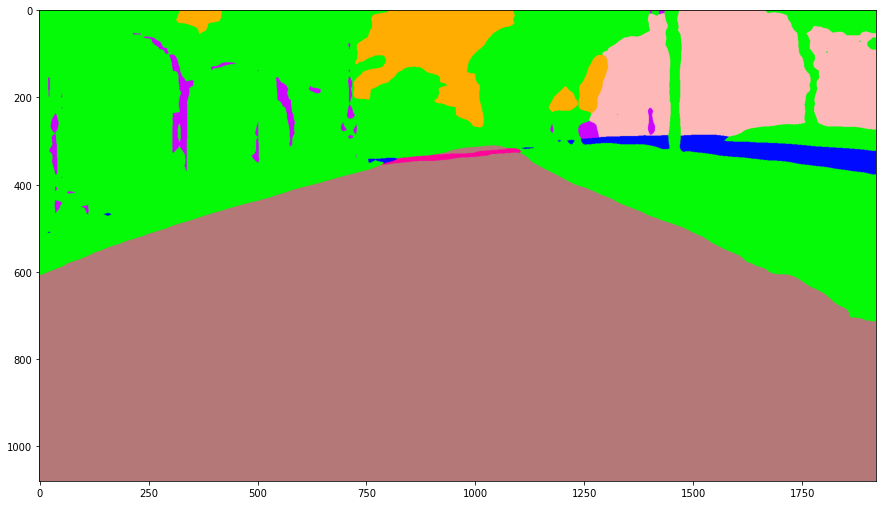

SC_PAR_20220831_131825_cam01.jpg
0


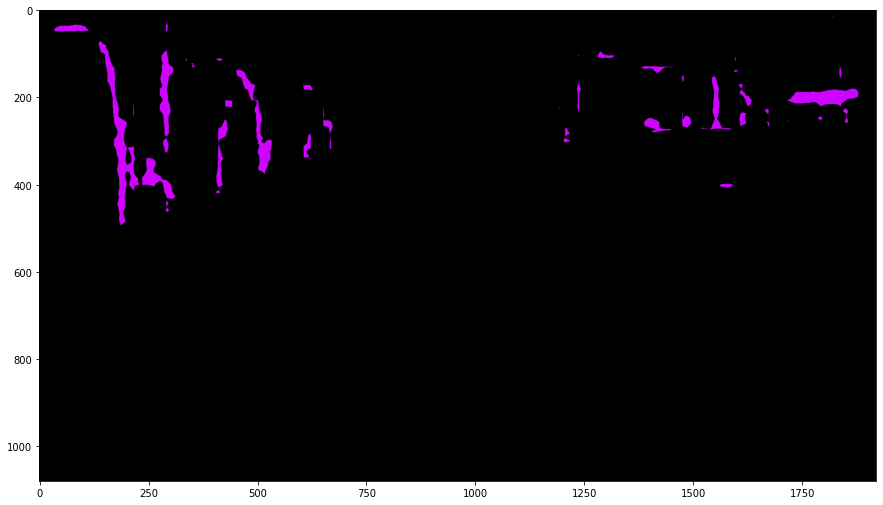

1


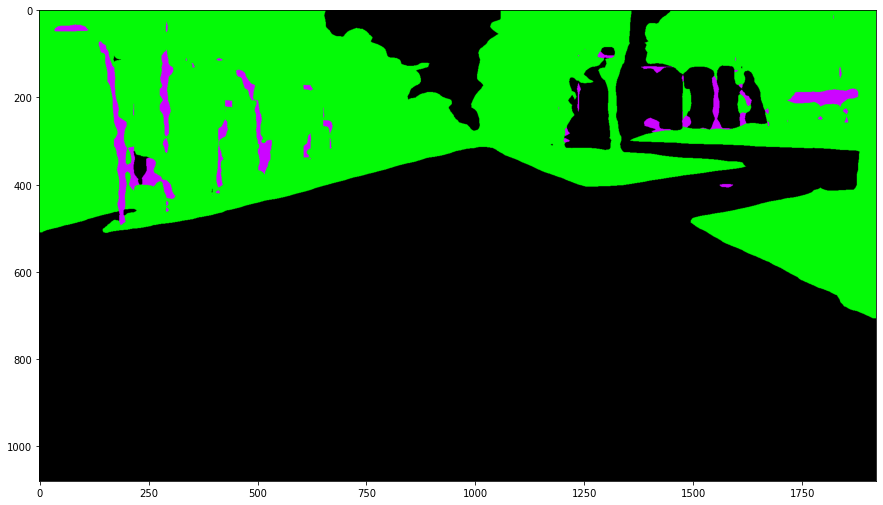

2


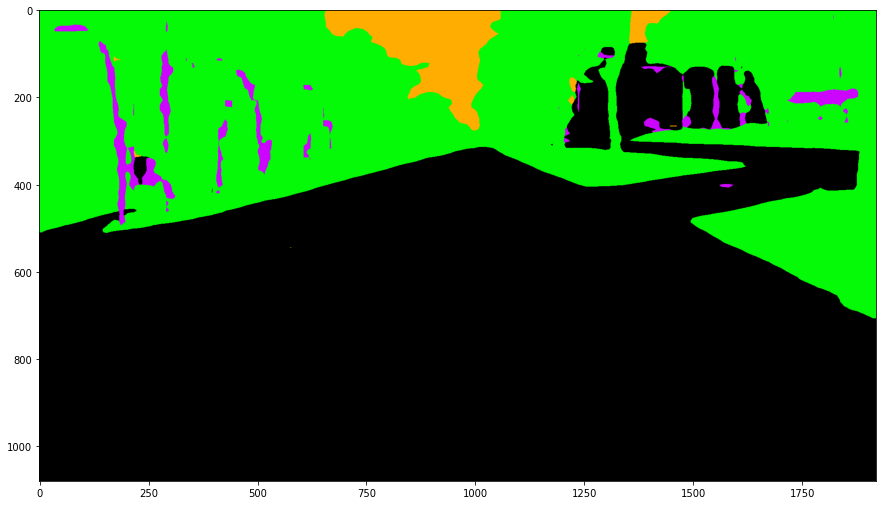

3


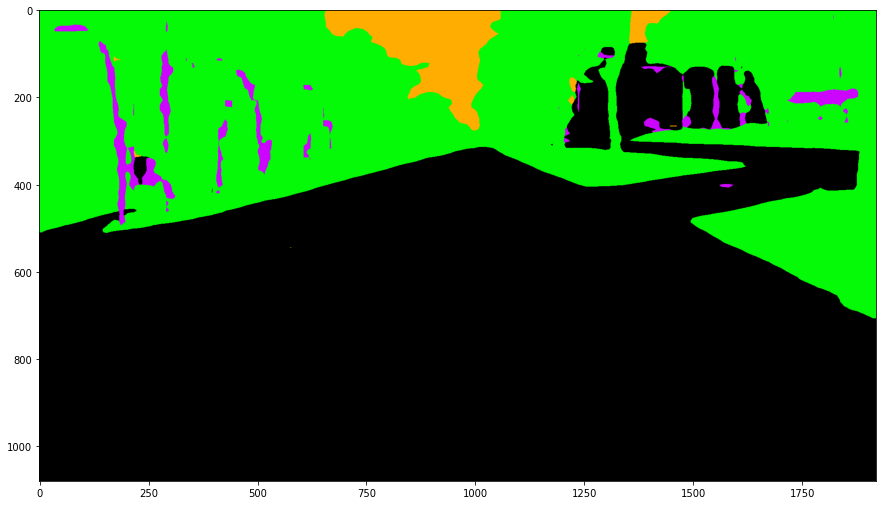

4


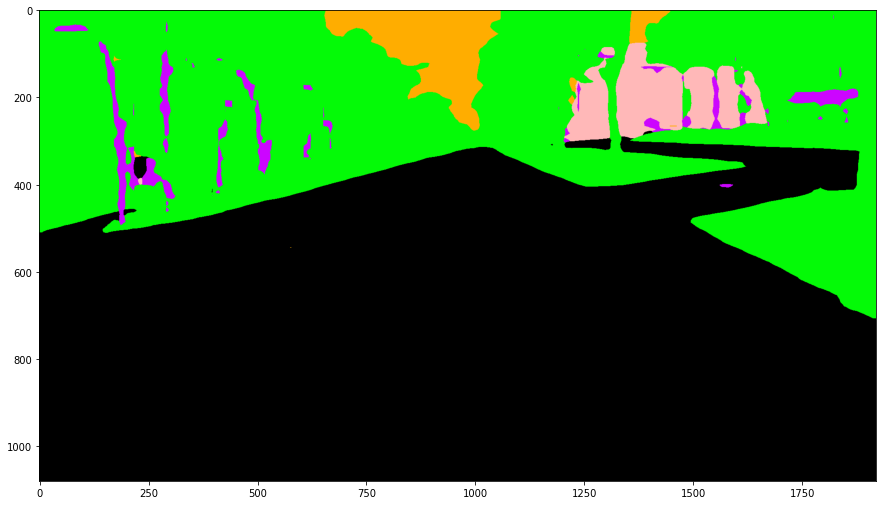

5


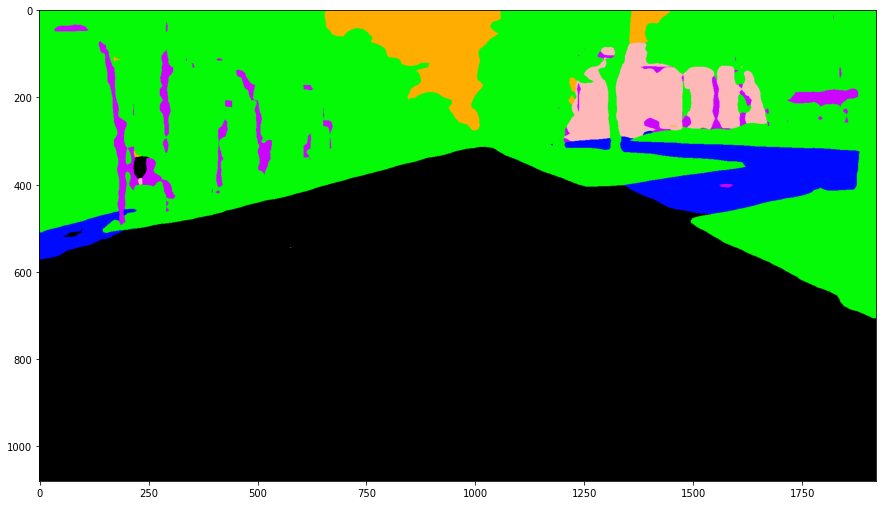

6


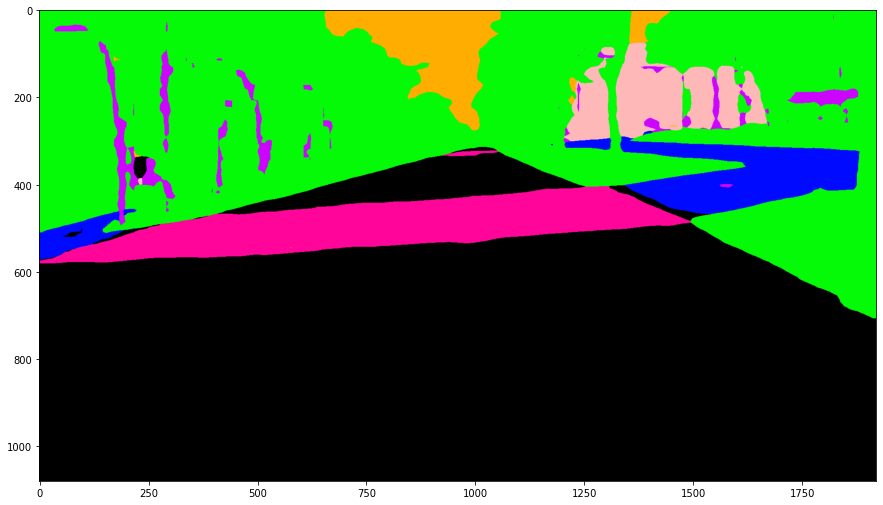

7


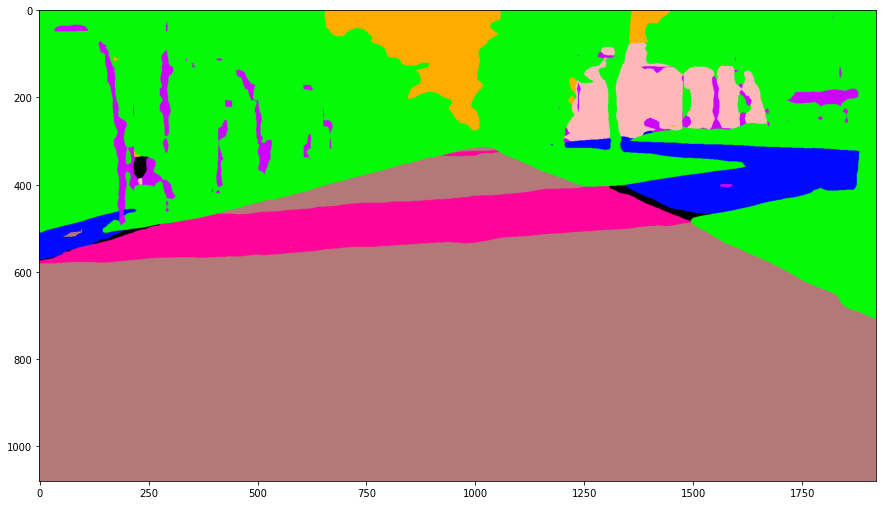

8


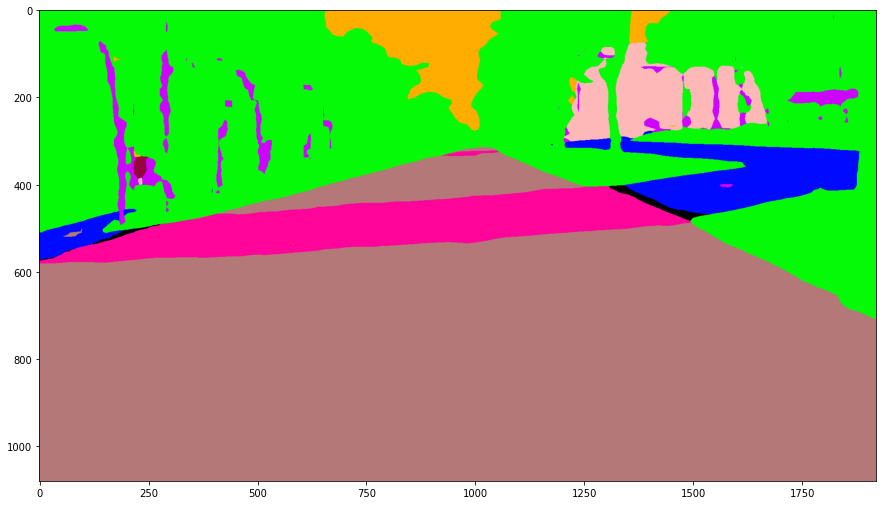

9


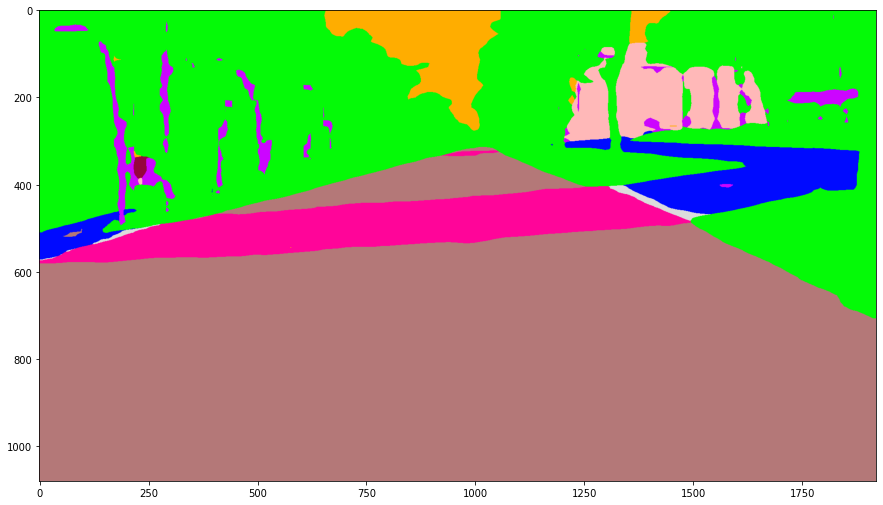

10


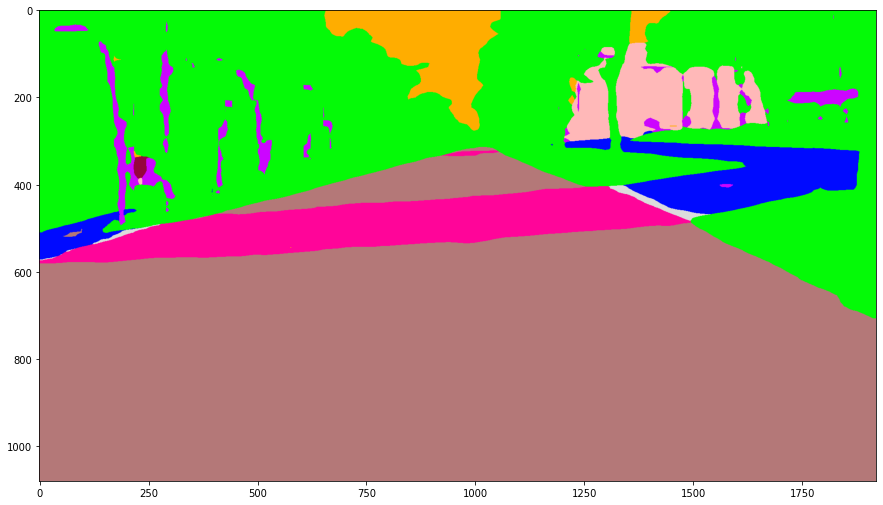

11


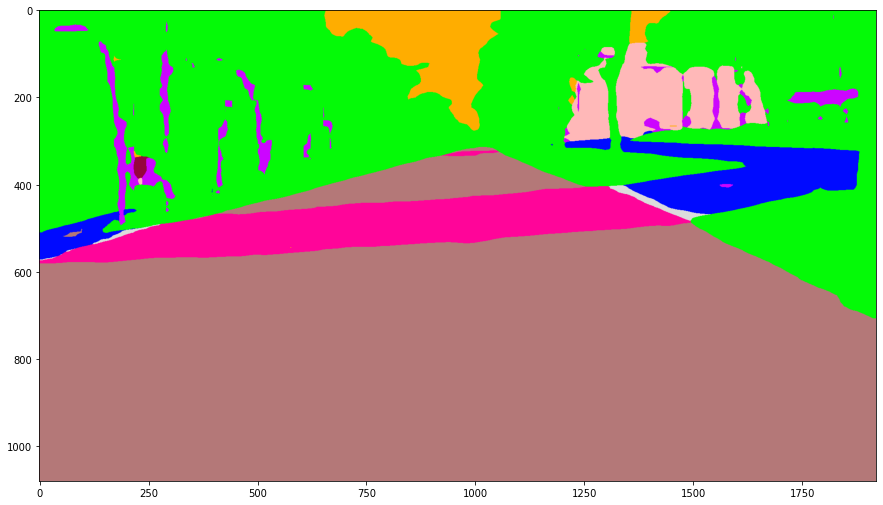

SC_PAR_20220831_131750_cam02.jpg
0


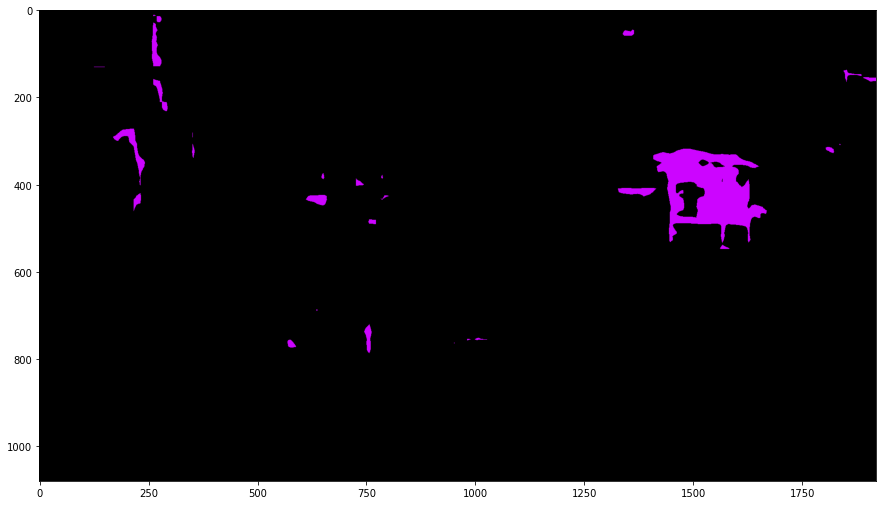

1


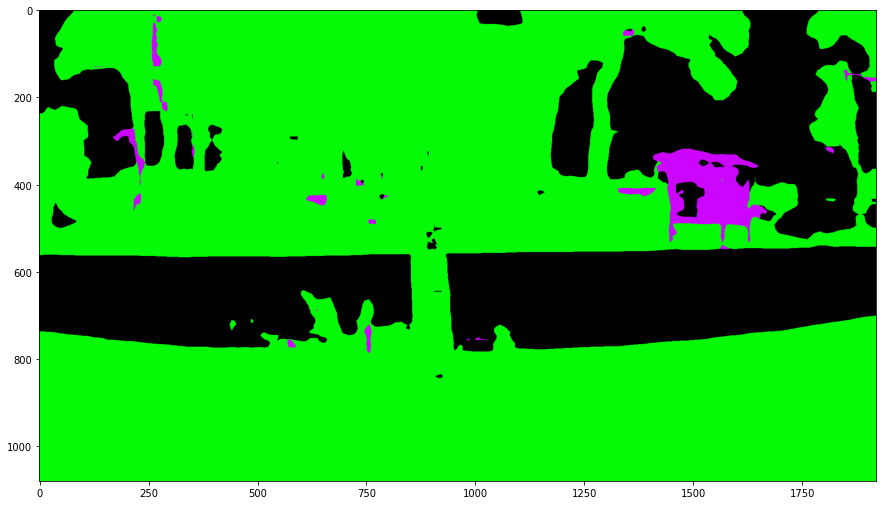

2


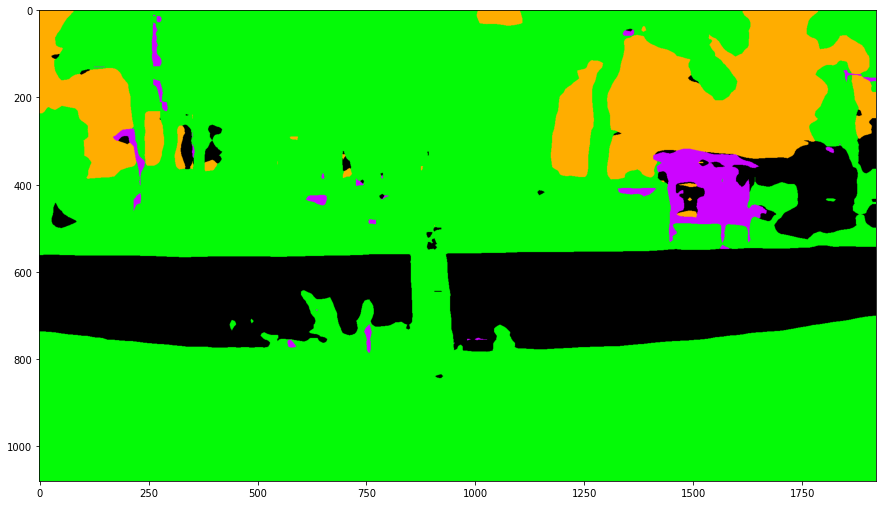

3


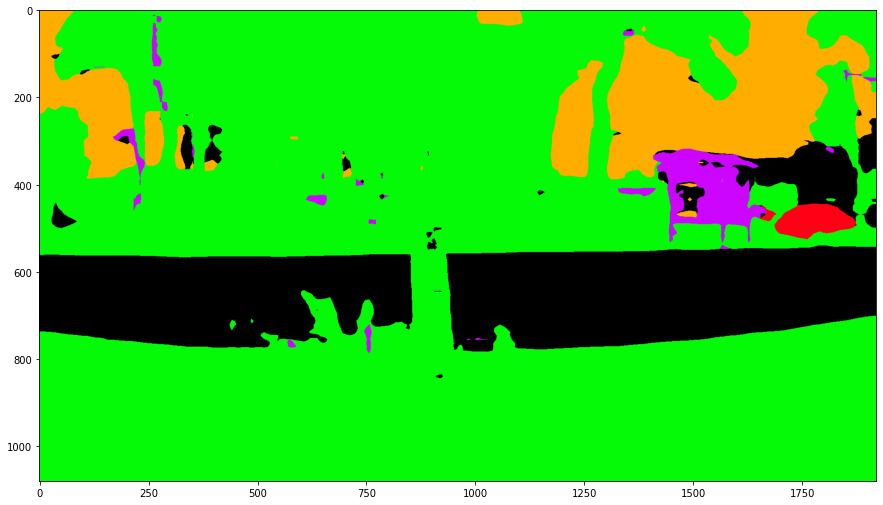

4


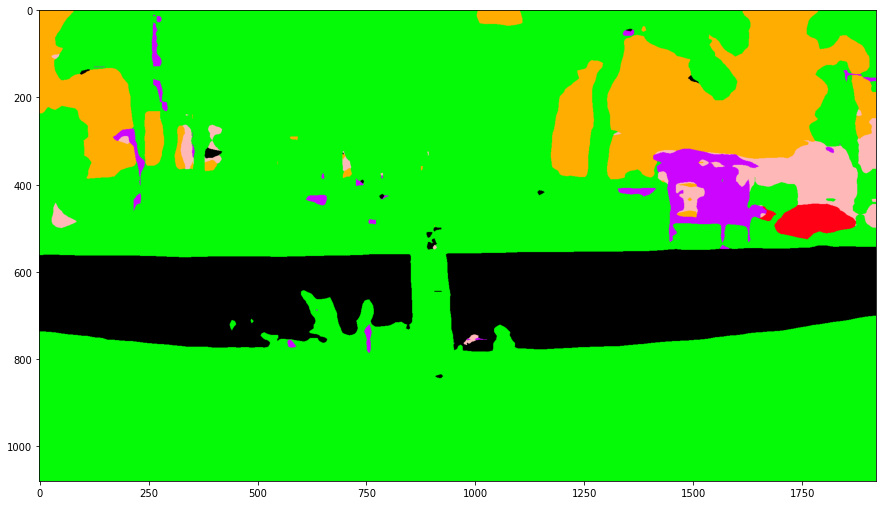

5


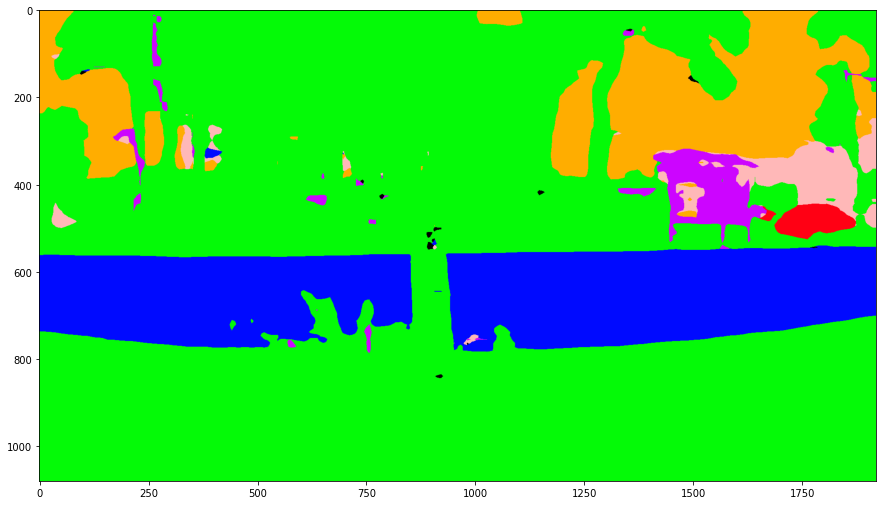

6


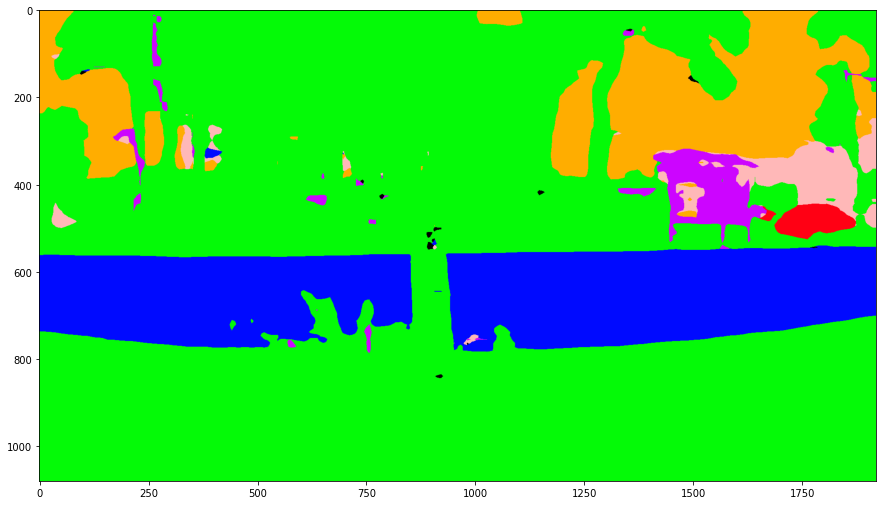

7


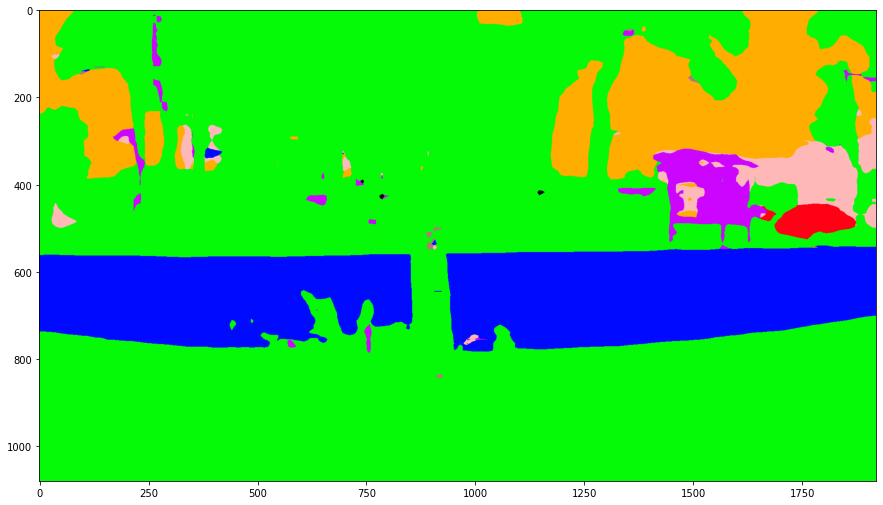

8


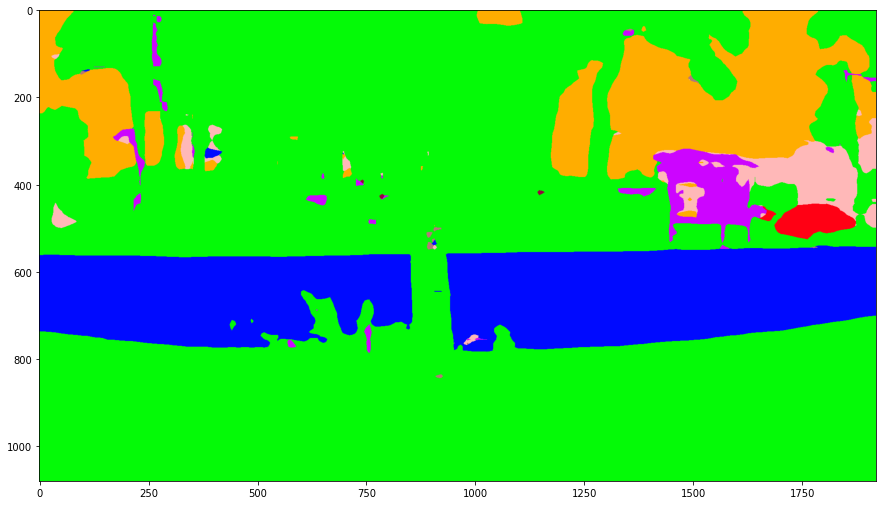

9


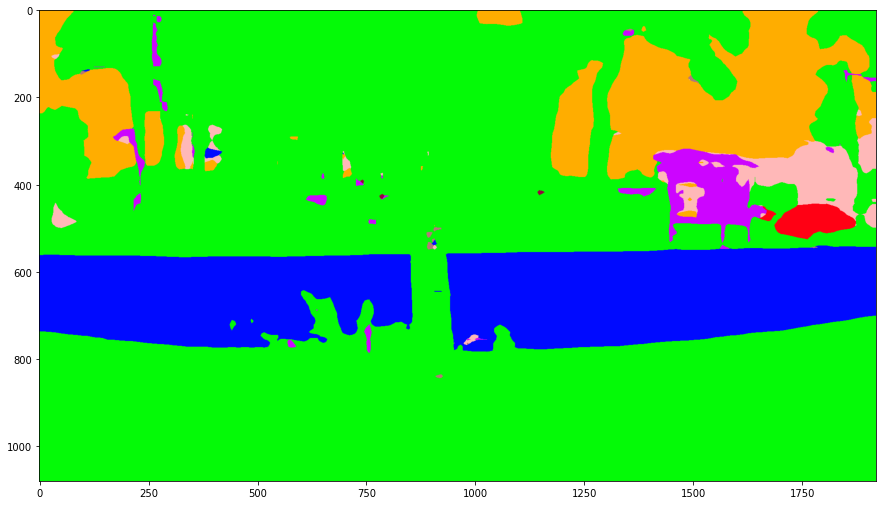

10


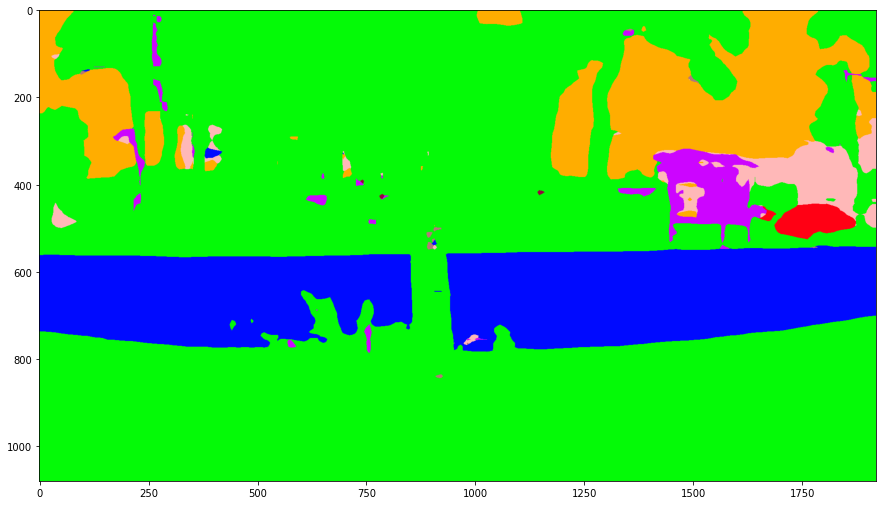

11


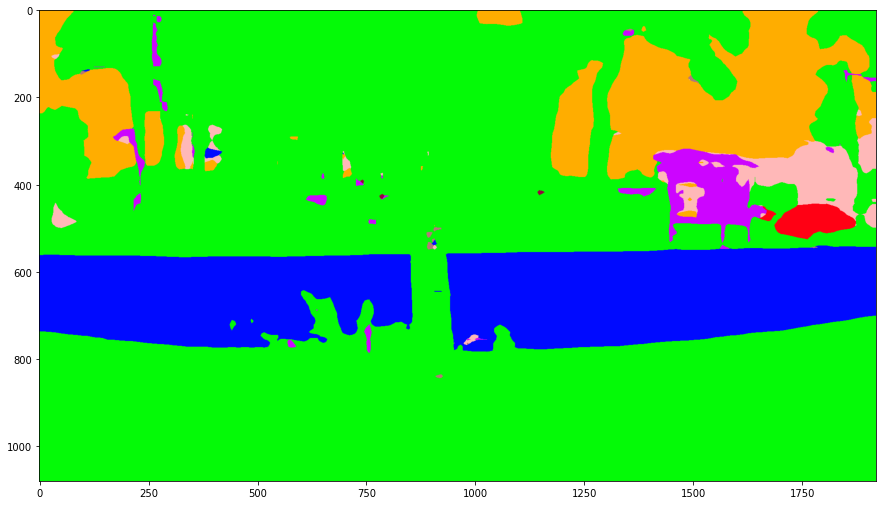

SC_PAR_20220831_131810_cam04.jpg
0


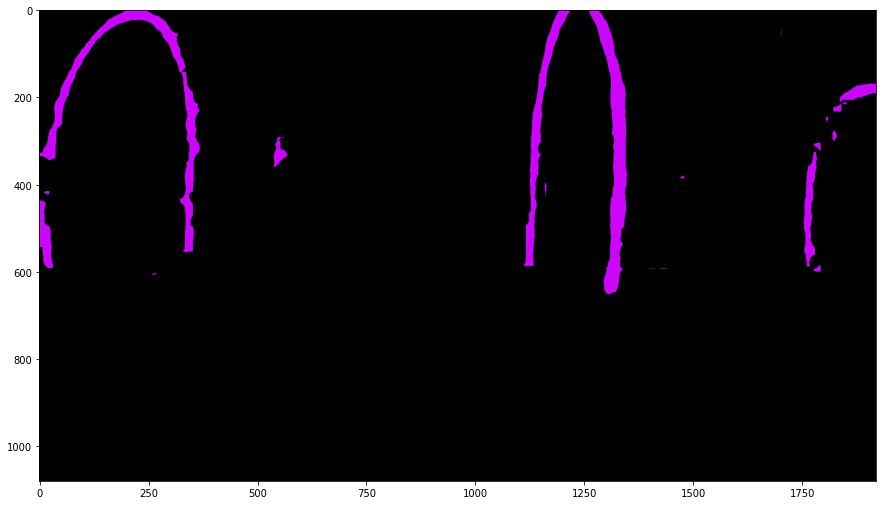

1


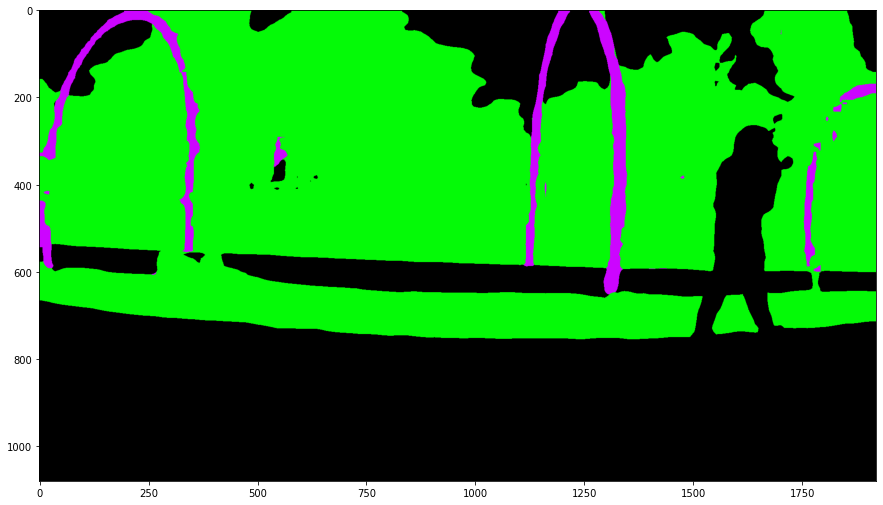

2


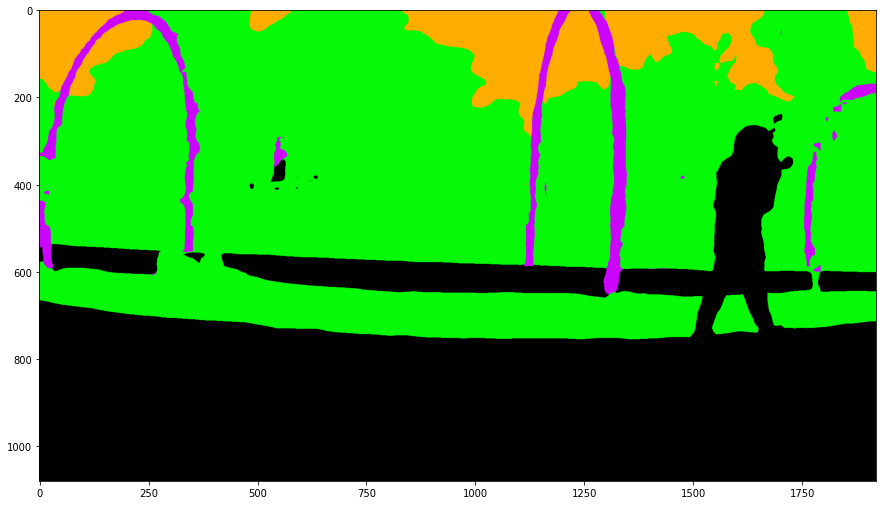

3


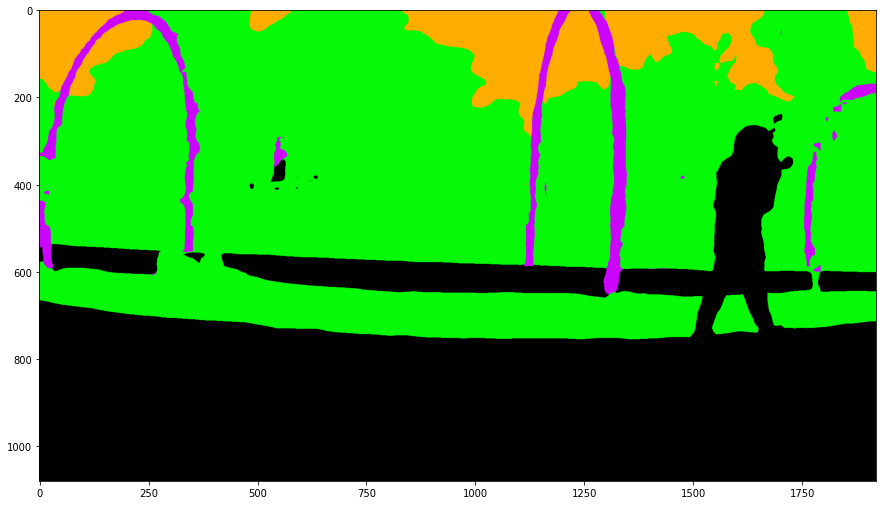

4


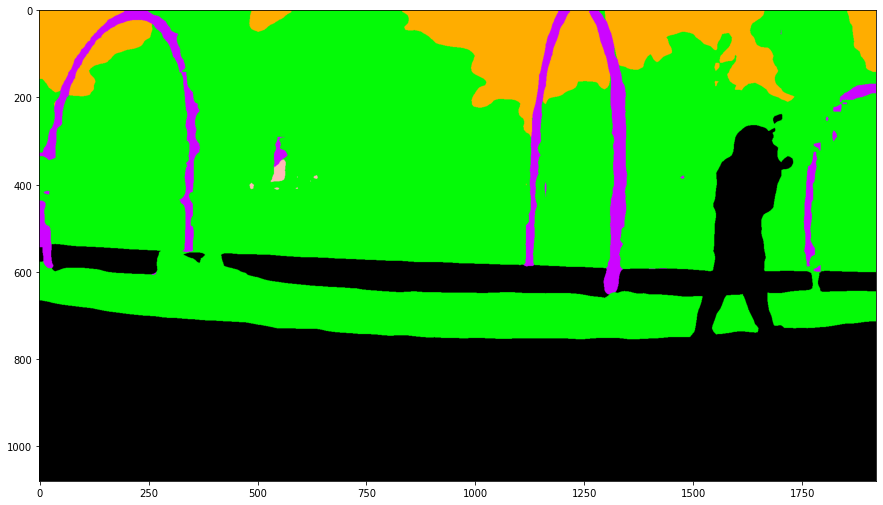

5


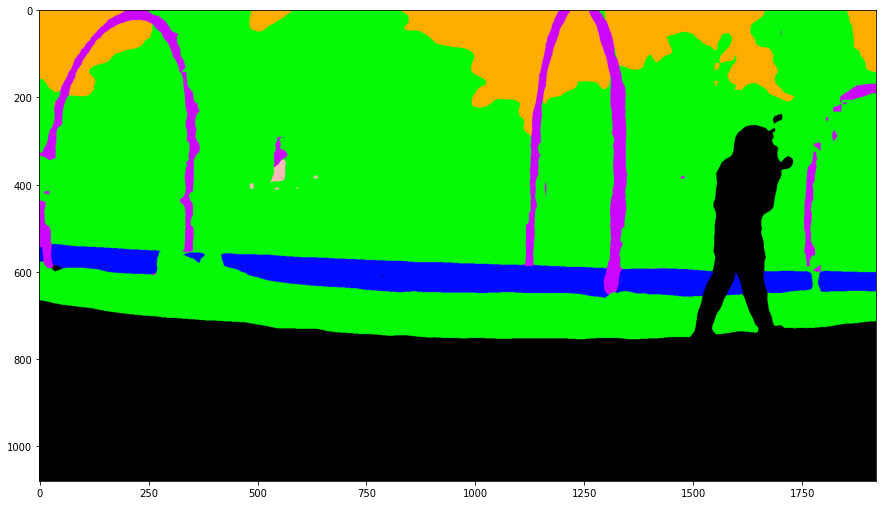

6


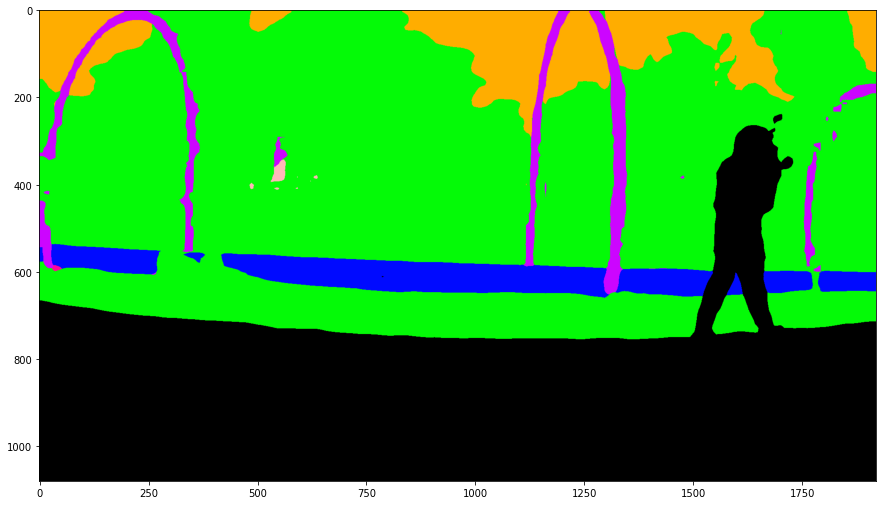

7


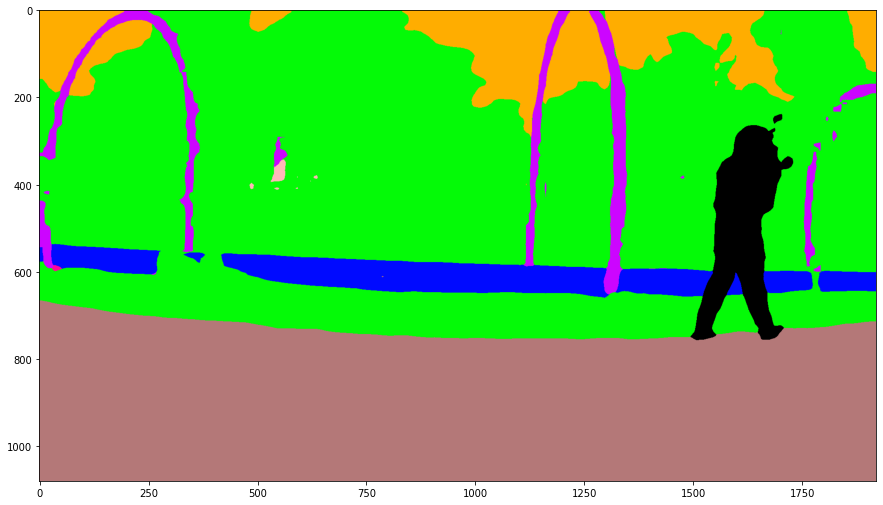

8


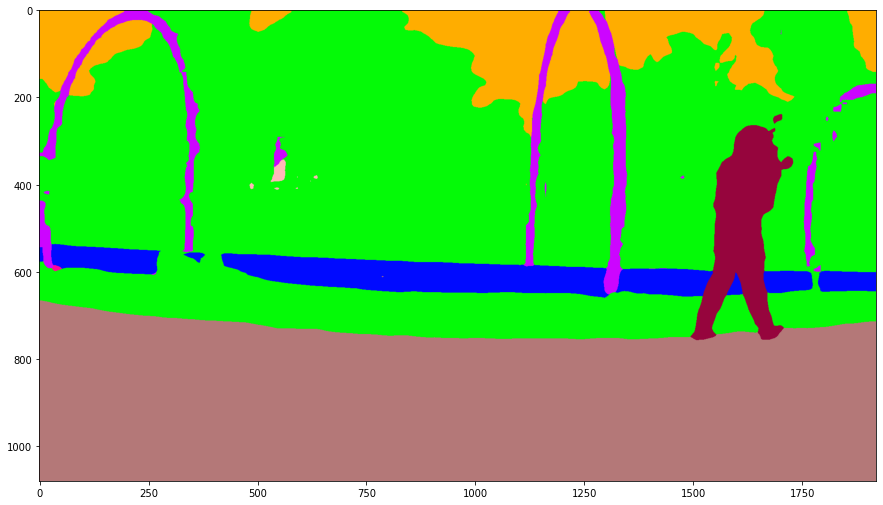

9


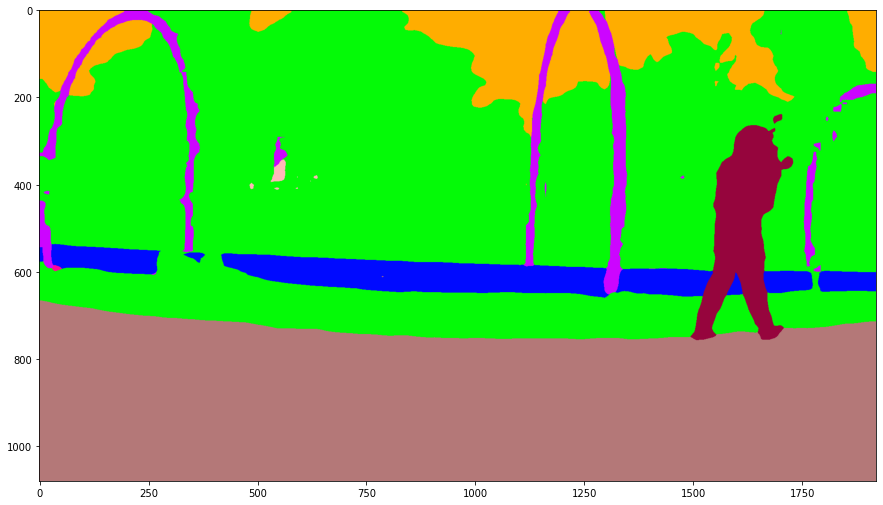

10


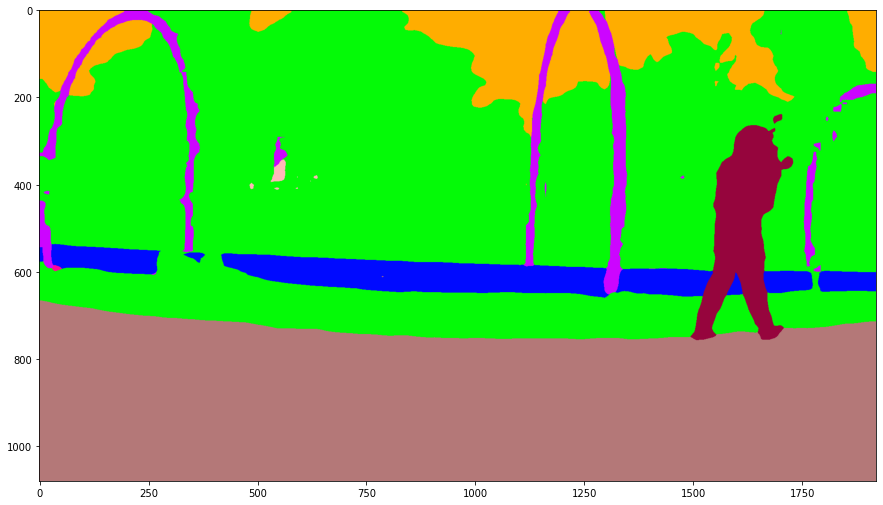

11


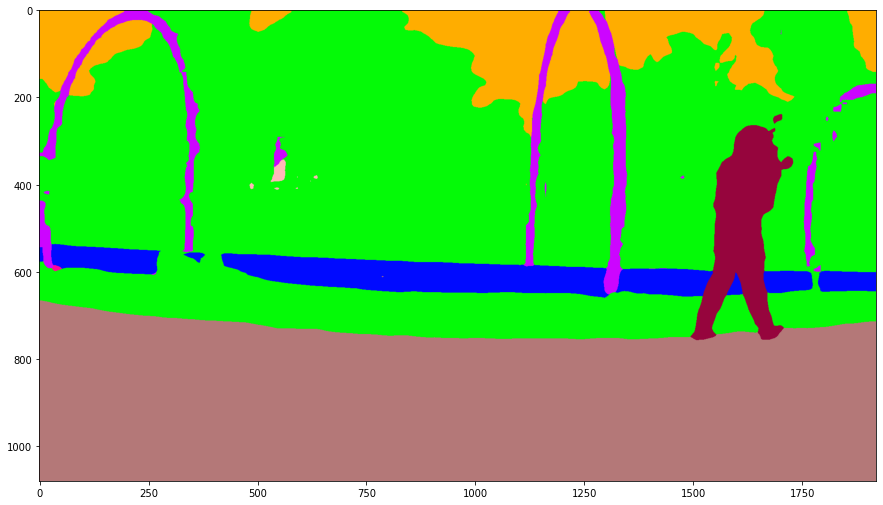

SC_PAR_20220831_131845_cam04.jpg
0


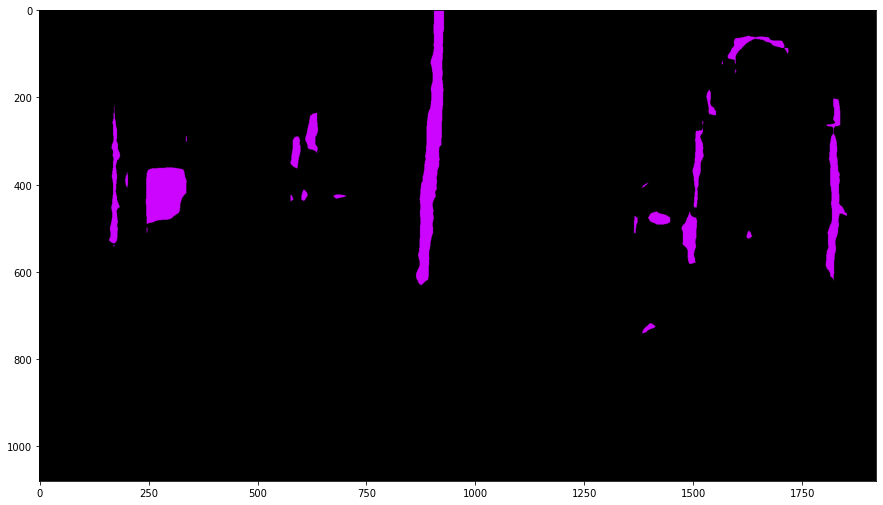

1


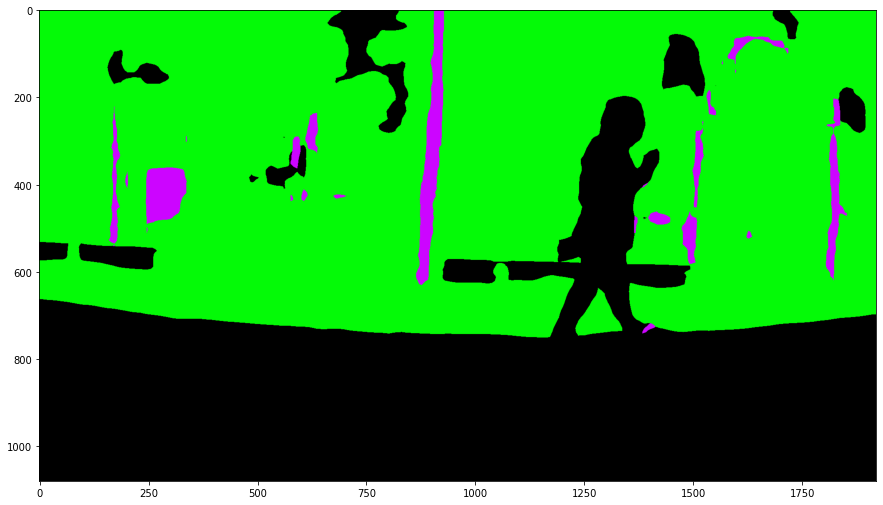

2


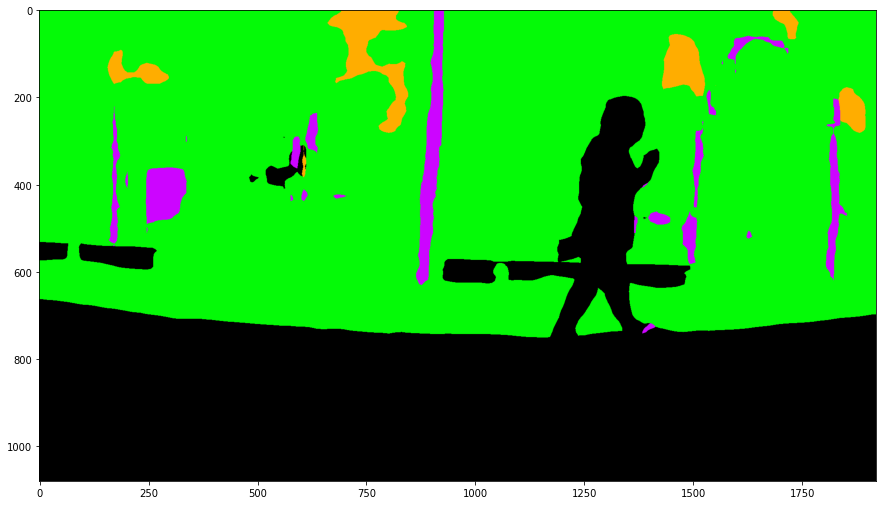

3


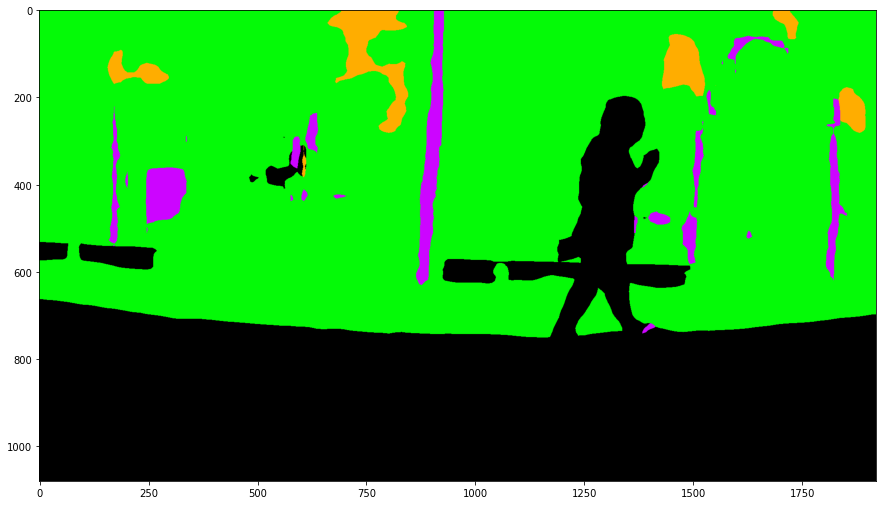

4


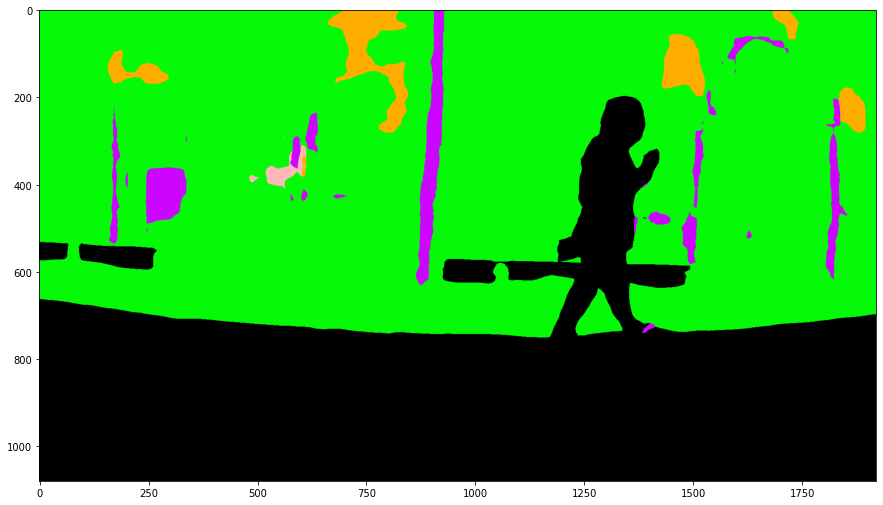

5


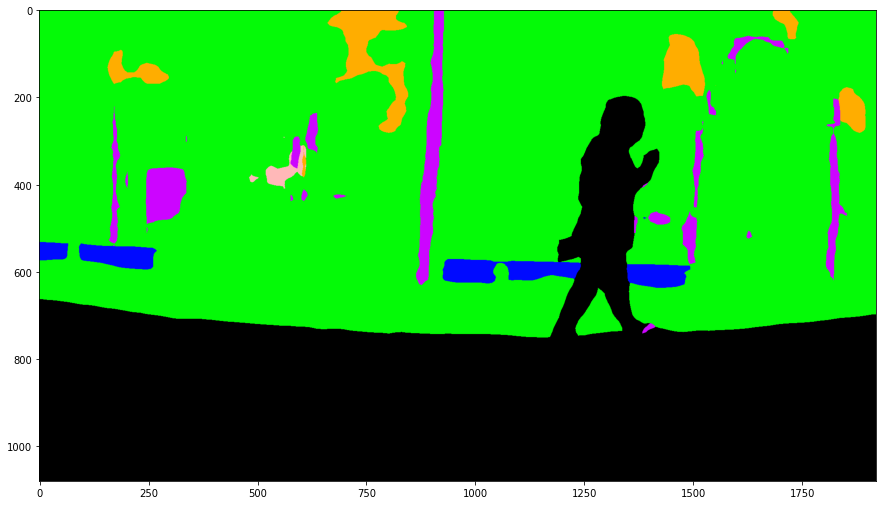

6


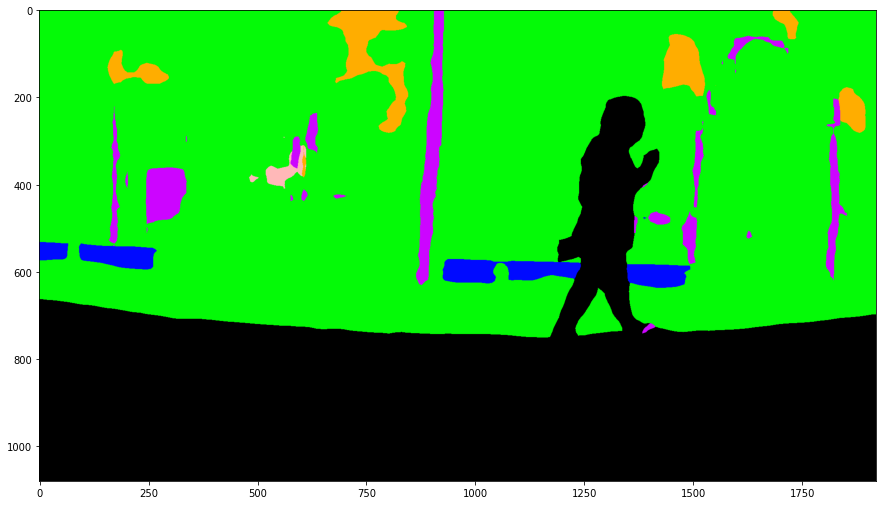

7


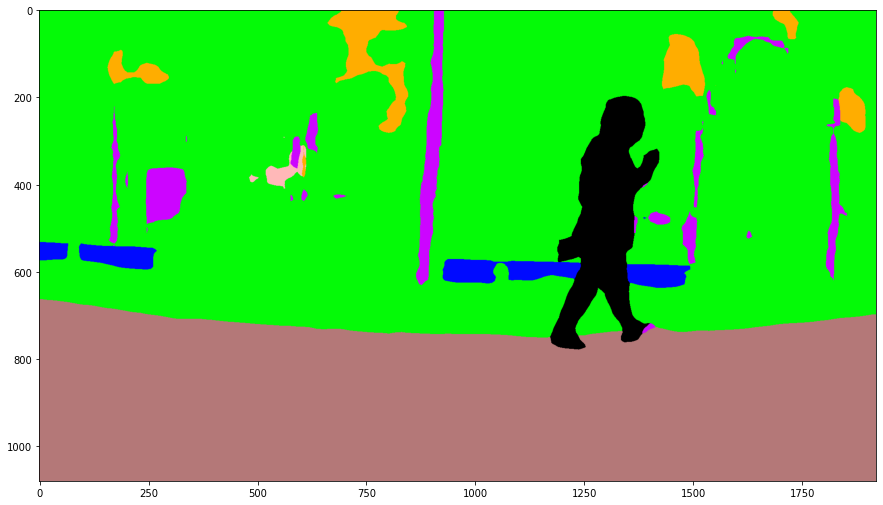

8


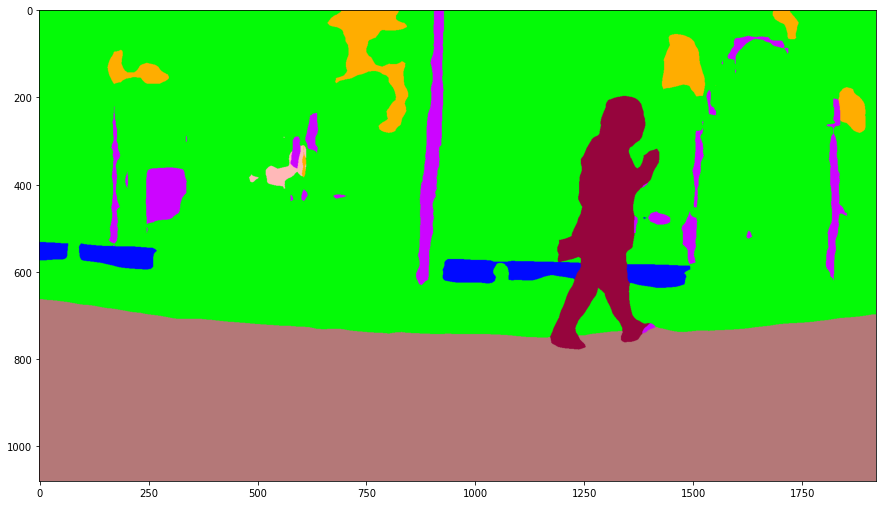

9


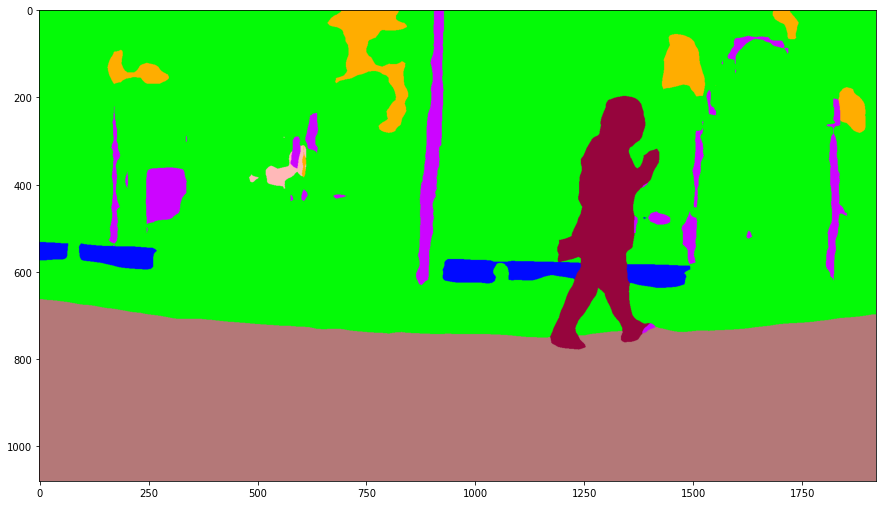

10


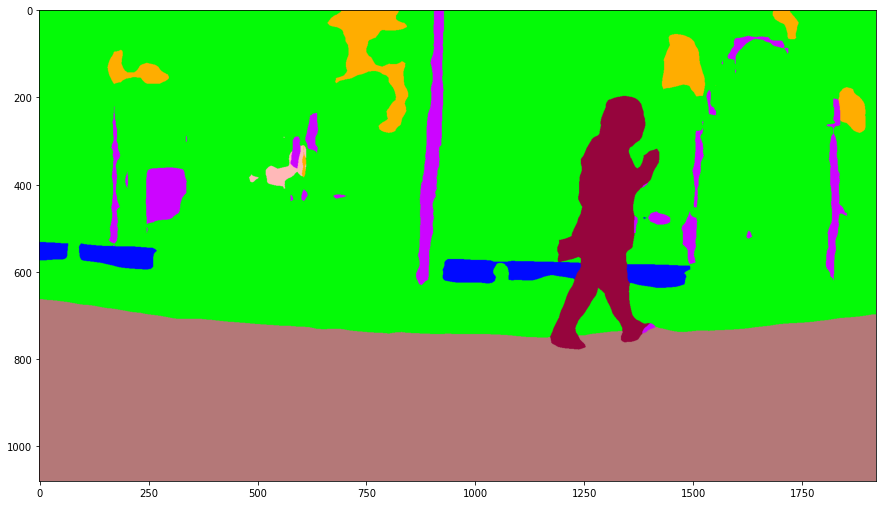

11


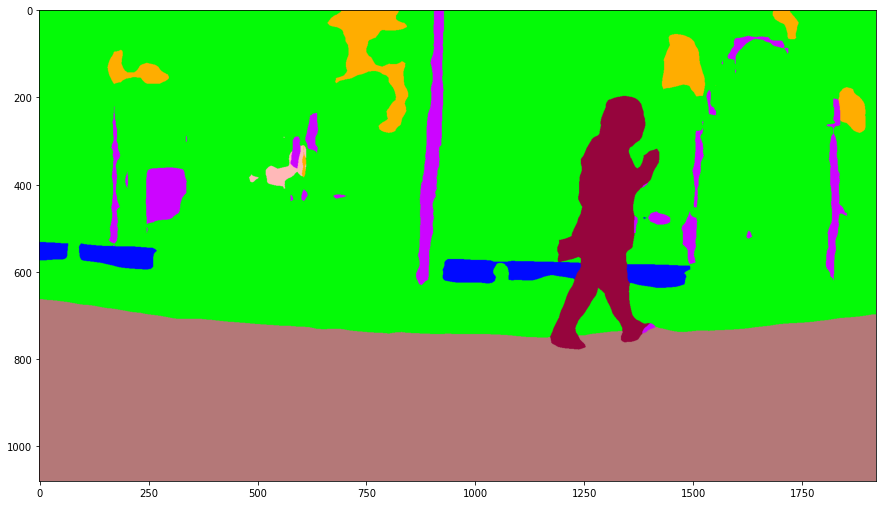

SC_PAR_20220831_131800_cam01.jpg


KeyboardInterrupt: 

In [1]:
from transformers import SegformerFeatureExtractor
feature_extractor = SegformerFeatureExtractor(reduce_labels=True)

from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import torch

from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

def ade_palette():
    return [[204, 5, 255], [4, 250, 7], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 10, 255], [255, 5, 153], [180, 120, 120],
            [150, 5, 61], [220, 220, 220], [255, 245, 0], [0, 102, 200]]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "../custom_checkpoint_2/model_345.pth"
model = torch.load(model_path)
model.to(device)
model.eval()     

save_dir = './test_dataset_result'
dataset_path = '../test_dataset'
fileEx = r'.jpg'
file_list = [file for file in os.listdir(dataset_path) if file.endswith(fileEx)]



for img_file in file_list : 
    img_full_path = f'{dataset_path}/{img_file}'
    
    img_save_path = f'{save_dir}/{img_file}' 

    image = Image.open(img_full_path)


    encoding = feature_extractor(image, return_tensors="pt")
    pixel_values = encoding.pixel_values.to(device)

    outputs = model(pixel_values)
    logits = outputs.logits.cpu()


    # First, rescale logits to original image size
    upsampled_logits = nn.functional.interpolate(logits,
                    size=image.size[::-1], # (height, width)
                    mode='bilinear',
                    align_corners=False)

    # Second, apply argmax on the class dimension
    seg = upsampled_logits.argmax(dim=1)[0]


    color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
    palette = np.array(ade_palette())
    for label, color in enumerate(palette): 
        color_seg[seg == label, :] = color
        img = np.array(image) * 0.5 + color_seg * 0.5

    img = img.astype(np.uint8)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    color_seg = cv2.cvtColor(color_seg, cv2.COLOR_RGB2BGR)
    cv_img = cv2.imread(img_full_path)

    img = cv2.resize(img, (640,360), dst=None, fx=None, fy=None, interpolation=None)
    color_seg = cv2.resize(color_seg, (640,360), dst=None, fx=None, fy=None, interpolation=None)
    cv_img = cv2.resize(cv_img, (640,360), dst=None, fx=None, fy=None, interpolation=None)

    save_img = np.concatenate((cv_img,img,color_seg),axis=1)
    cv2.imwrite(img_save_path,save_img)
    
#     plt.figure(figsize=(15, 10))
#     plt.imshow(color_seg)
#     plt.show()

In [ ]:
# label_list = {"0": "obstacle" , #보라색
#      "1": "vegetation",  #연두색
#      "2": "void", #주황
#      "3": "truck", #빨강
#      "4": "building", #분홍
#      "5": "sidewalk", #파랑
#      "6": "crosswalk", # 핫핑크
#      "7": "road", # 갈색
#      "8": "pedestrian", #카키색
#      "9": "stone", #회색
#      "10": "bicycle", #노란색
#      "11": "vehicle"} #네이비